# Predicting Rainfalls in Selangor, Malaysia using ARIMA Forecasting

This Notebook will analyze and attempt to project a future prediction of rainfalls in the Selangor state, Malaysia.
- The baseline data is projected from the time period of 1st Jan 2014 (2014-01-01) till 31st Dec 2020 (2020-12-31), and
- The future prediction will be conducted using Time Series Forecasting with Auto-Regressive Integrated Moving Average (ARIMA) from the time period of 1st Jan 2021 (2021-01-01) till 31st Dec 2022 (2022-12-31).

The data can be obtained from the Malaysia Data Registry `data.gov.my` through the following links:
1. Method 1 (CCSM): https://www.data.gov.my/data/ms_MY/dataset/daily-projected-rainfall-for-scenario-ccsm3a1fi-by-state-in-peninsular-malaysia
2. Method 2 (ECHM): https://www.data.gov.my/data/ms_MY/dataset/daily-projected-rainfall-for-scenario-echm5a1b2-by-state-in-peninsular-malaysia
3. Method 3 (MRIB): https://www.data.gov.my/data/ms_MY/dataset/daily-projected-rainfall-for-scenario-mrib1-by-state-in-peninsular-malaysia

This Notebook is created by: Muhammad Azammuddin bin Suratem (`@azamsuratem` on GitHub)

<a id="T"></a>
## Table of Contents
[<b>Step 1</b> Importing required libraries](#S1)

[<b>Step 2</b> Data Extraction and Load](#S2)
- [<b>Part 1</b> Extract from CSV files and load into dataframes](#S2_1)
- [<b>Part 2</b> Initial checking - `.head()` and `.tail()`](#S2_2)
- [<b>Part 3</b> Checking for missing values using `missingno`](#S2_3)

[<b>Step 3</b> Summary of the Extracted Data](#S3)
- [<b>Part 1</b> Summary of data structure using `.info()`](#S3_1)
- [<b>Part 2</b> Statistics summary - Pandas `.describe()` and statsmodels `describe`](#S3_2)

[<b>Step 4</b> Data Cleaning/Manipulation](#S4)
- [<b>Part 1</b> Creating a new column `Date`](#S4_1)
- [<b>Part 2</b> Restructuring the dataframe](#S4_2)
- [<b>Part 3</b> Combine the data into a single dataframe](#S4_3)
- [<b>Part 4</b> Extracting data for the Selangor state only](#S4_4)
- [<i><b>Extra</b> Extracting the overall data by mean values i.e. Peninsular Malaysia</i>](#S4_E)

[<b>Step 5</b> Visualizing the Data](#S5)
- [<b>Part 1</b> Time series plots using Matplotlib `.plot(kind="line")`](#S5_1)
- [<b>Part 2</b> Boxplots using Seaborn `.boxplot()`](#S5_2)
- [<i><b>Extra</b> Visualizing the mean, Peninsular Malaysia data</i>](#S5_E)

[<b>Step 6</b> Dealing with Outliers](#S6)
- [<b>Part 1</b> Descriptive Statistics for Manual Detection](#S6_1)
- [<b>Part 2</b> Removing outliers - Imputation with Median values](#S6_2)
- [<b>Part 3</b> Visualizing the Edited data](#S6_3)
- [<i><b>Extra</b> Dealing with outliers in the mean, Peninsular Malaysia data</i>](#S6_E)

[<b>Step 7</b> Exploratory Data Analysis (EDA) for Time Series](#S7)
- [<b>Part 1</b> Seasonal Decomposition plots](#S7_1)
- [<b>Part 2</b> Stationarity Checking - Rolling Mean & Rolling Std. Dev.](#S7_2)
- [<b>Part 3</b> Stationarity Checking (cont.) - Augmented Dickey-Fuller (ADF) Test](#S7_3)
- [<b>Part 4</b> Regular Differencing for Stationarity](#S7_4)
- [<b>Part 5</b> Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots](#S7_5)

[<b>Step 8</b> Building the ARIMA Model](#S8)
- [<b>Pre-Modelling</b> Separating the Data](#S8_I)
- [<b>Part 1</b> Finding the Best Parameters for the Model](#S8_1)
- [<b>Part 2</b> Defining functions to build the Model](#S8_2)
- [<b>Part 3</b> Testing (and Visualizing) the Model](#S8_3)

[<b>Step 9</b> Prediction using the ARIMA Model](#S9)
- [<b>Part 1</b> Prediction for Method 1 (CCSM)](#S9_1)
- [<b>Part 2</b> Prediction for Method 2 (ECHM)](#S9_2)
- [<b>Part 3</b> Prediction for Method 3 (MRIB)](#S9_3)

[<b>References</b>](#R)

<a id="S1"></a>
### Step 1 - Importing required libraries
Import libraries that will be used for the analysis including `statsmodels` and `scikit-learn`

In [1]:
# importing NumPy and Pandas for basic Python structures to work with data
import numpy as np
import pandas as pd

# importing statsmodels describe function for enhanced statistics summary
from statsmodels.stats.descriptivestats import describe as desc

# importing functions for statistical tests in validating the prediction models
# square root
from math import sqrt
# inter-quartile range (IQR)
from scipy.stats import iqr
# Pearson correlation
from scipy.stats import pearsonr
# T-test and F-test
from scipy.stats import ttest_ind as T_test
from scipy.stats import f_oneway as F_test
# Mean Errors
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
# R-squared regression score
from sklearn.metrics import r2_score as R2

# importing functions for exploratory data analysis (EDA) on the time series
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller as ADF
# Autocorrelation function (ACF) and Partial Autocorrelation function (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing statsmodels ARIMA and itertools product functions to obtain the best ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# importing datetime functions to prepare prediction timelines
from datetime import datetime, timedelta

# importing scikit-learn PowerTransformer function to conduct the predictions
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

# importing Matplotlib ans Seaborn for graphing/visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import seaborn as sns

# importing missingno to locate any missing values in the data
from missingno import matrix as MissingMatrix

# to ignore any future warnings
import warnings
warnings.filterwarnings("ignore")

[Back to Table of Contents](#T)

<a id="S2"></a>
### Step 2 - Data Extraction and Load

<a id="S2_1"></a>
#### Part 1 - Extract from CSV, Load into DataFrame
Load the data using the Pandas command `pd.read_csv()`

In [2]:
method1 = pd.read_csv('data/daily-projected-rainfall-ccsm3a1fi-for-2014-2020-by-state-in-peninsular-malaysia.csv', header=0)
method2 = pd.read_csv('data/daily-projected-rainfall-echm5a1b2-for-2014-2020-by-state-in-peninsular-malaysia.csv', header=0)
method3 = pd.read_csv('data/daily-projected-rainfall-mrib1-for-2014-2020-by-state-in-peninsular-malaysia.csv', header=0)

<a id="S2_2"></a>
#### Part 2 - Initial checking
Check the contents of the data first by using the `.head()` and `.tail()` commands

In [3]:
method1.head()

State  Year  Month  Day  Rainfall (mm)
0  Johor  2014      1    1           0.19
1  Johor  2014      1    2           1.73
2  Johor  2014      1    3           2.20
3  Johor  2014      1    4           1.27
4  Johor  2014      1    5           0.85

In [4]:
method1.tail()

State  Year  Month  Day  Rainfall (mm)
30679  Terengganu  2020     12   27           0.28
30680  Terengganu  2020     12   28           0.09
30681  Terengganu  2020     12   29           0.05
30682  Terengganu  2020     12   30           0.11
30683  Terengganu  2020     12   31           2.04

In [5]:
method2.head()

State  Year  Month  Day  Rainfall (mm)
0  Johor  2014      1    1           4.37
1  Johor  2014      1    2           2.53
2  Johor  2014      1    3           9.31
3  Johor  2014      1    4           8.56
4  Johor  2014      1    5           5.24

In [6]:
method2.tail()

State  Year  Month  Day  Rainfall (mm)
30679  Terengganu  2020     12   27          23.66
30680  Terengganu  2020     12   28          46.57
30681  Terengganu  2020     12   29         127.16
30682  Terengganu  2020     12   30          10.45
30683  Terengganu  2020     12   31          17.85

In [7]:
method3.head()

State  Year  Month  Day  Rainfall (mm)
0  Johor  2014      1    1           5.74
1  Johor  2014      1    2           7.47
2  Johor  2014      1    3          14.33
3  Johor  2014      1    4          32.75
4  Johor  2014      1    5          21.56

In [8]:
method3.tail()

State  Year  Month  Day  Rainfall (mm)
30679  Terengganu  2020     12   27          21.96
30680  Terengganu  2020     12   28          16.44
30681  Terengganu  2020     12   29          16.81
30682  Terengganu  2020     12   30          16.08
30683  Terengganu  2020     12   31          16.42

[Back to Table of Contents](#T)

<a id="S2_3"></a>
#### Part 3 - Checking for Missing Values
Also check the extracted data for missing values using the imported `MissingMatrix` function from the `missingno` library

Thanks to `@subinium` in the Kaggle.com Notebook entry [<b>Basic of Statistical Viz : Plotly & Seaborn</b>](https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn) for the guideline in checking for missing values after extracting the data

Checking method1 for any missing values...


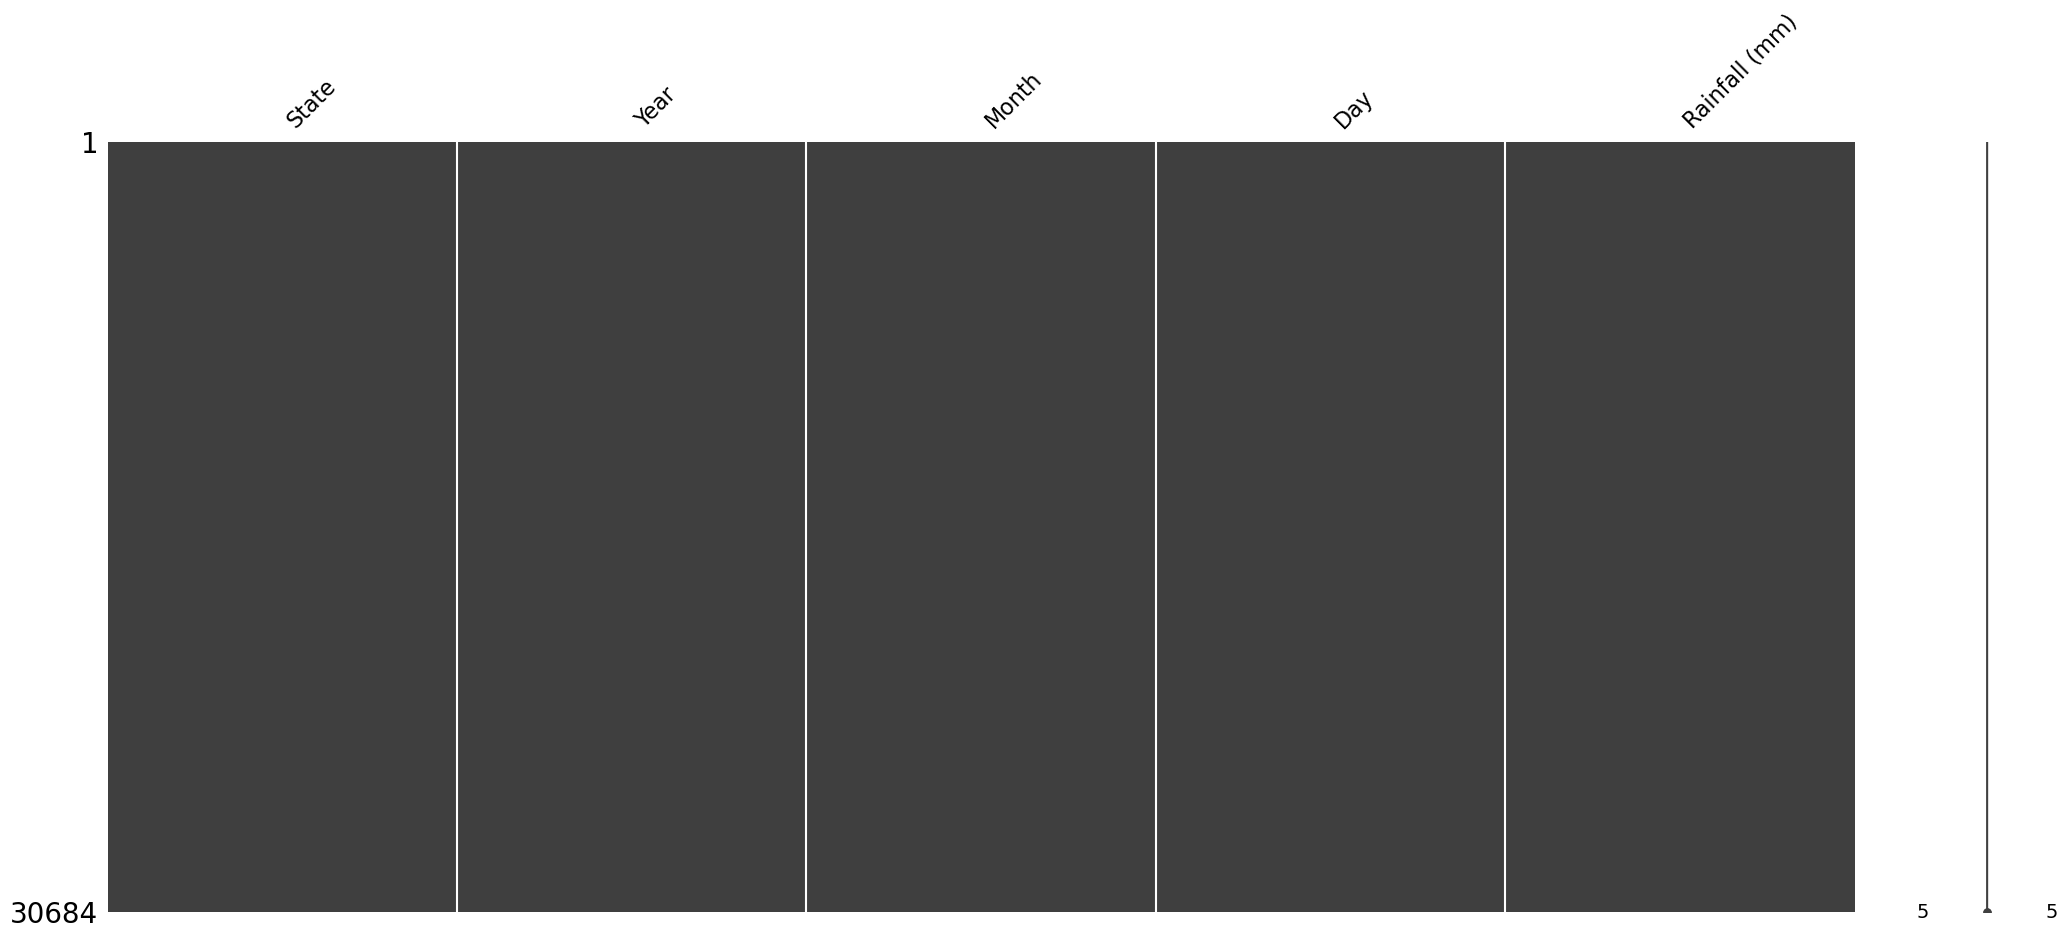


Checking method2 for any missing values...


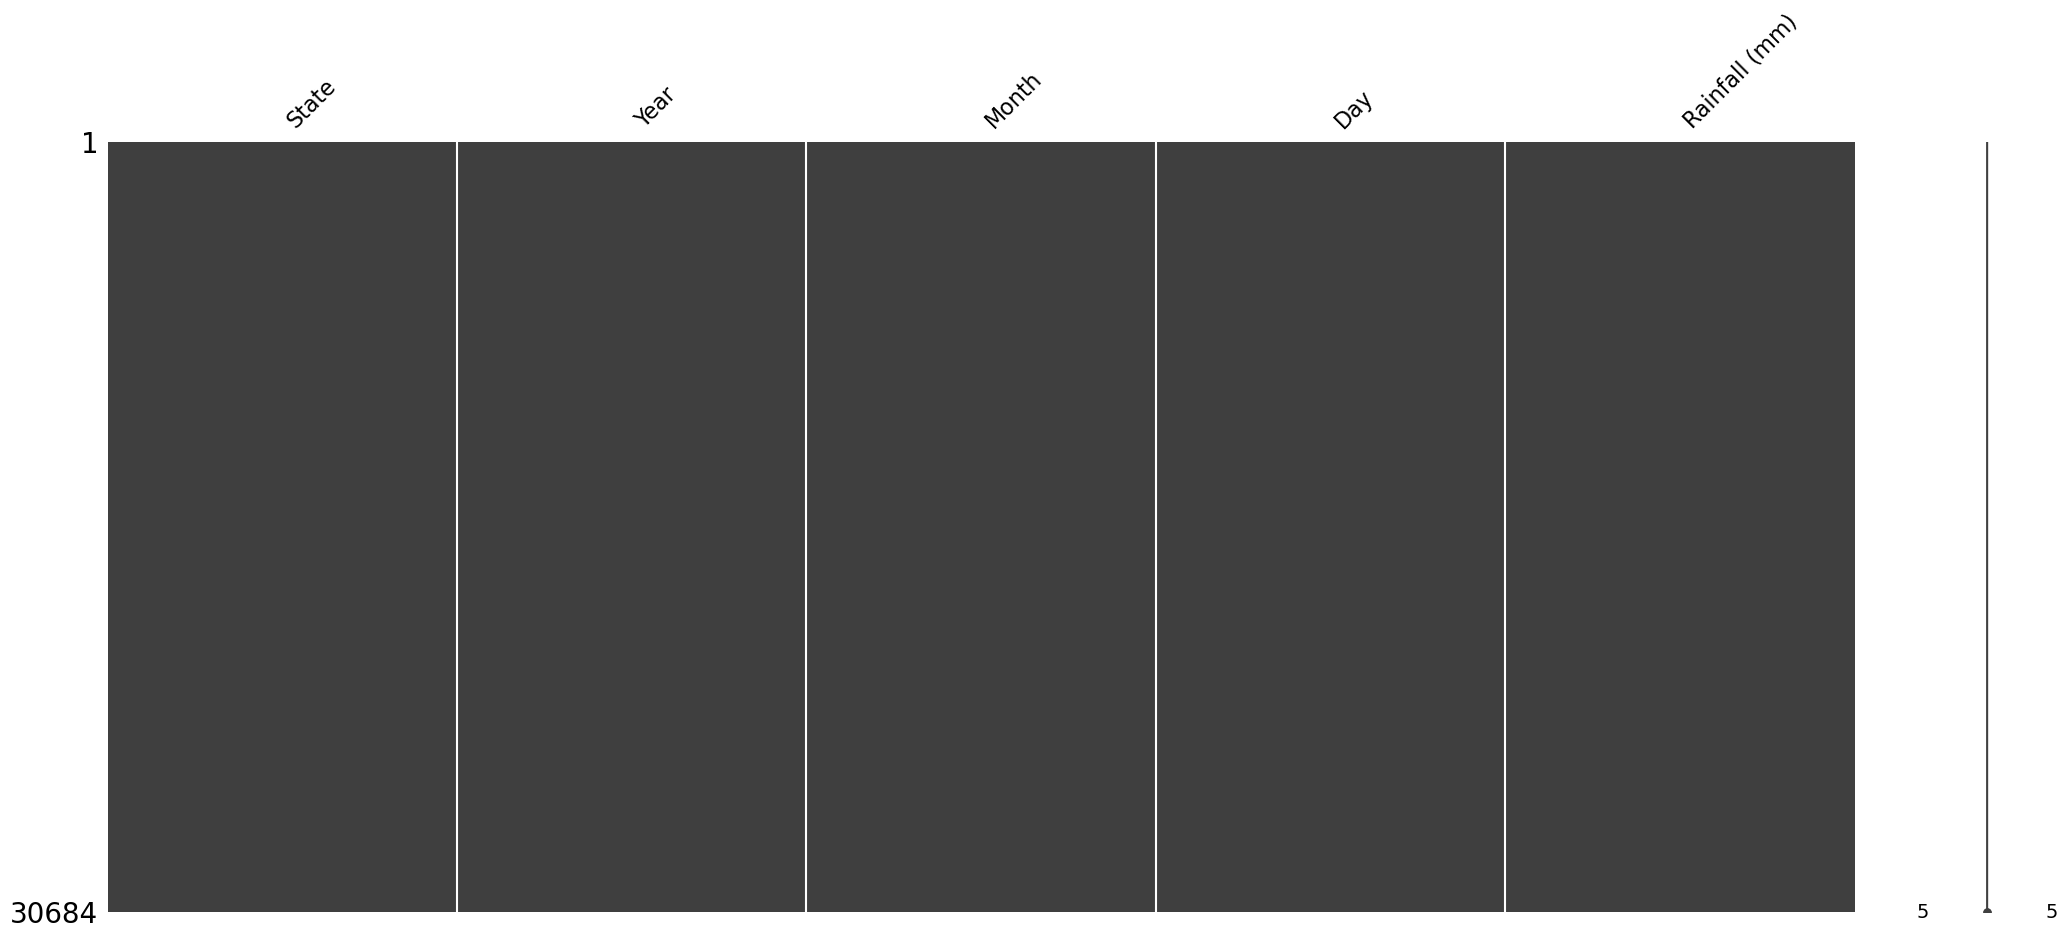


Checking method3 for any missing values...


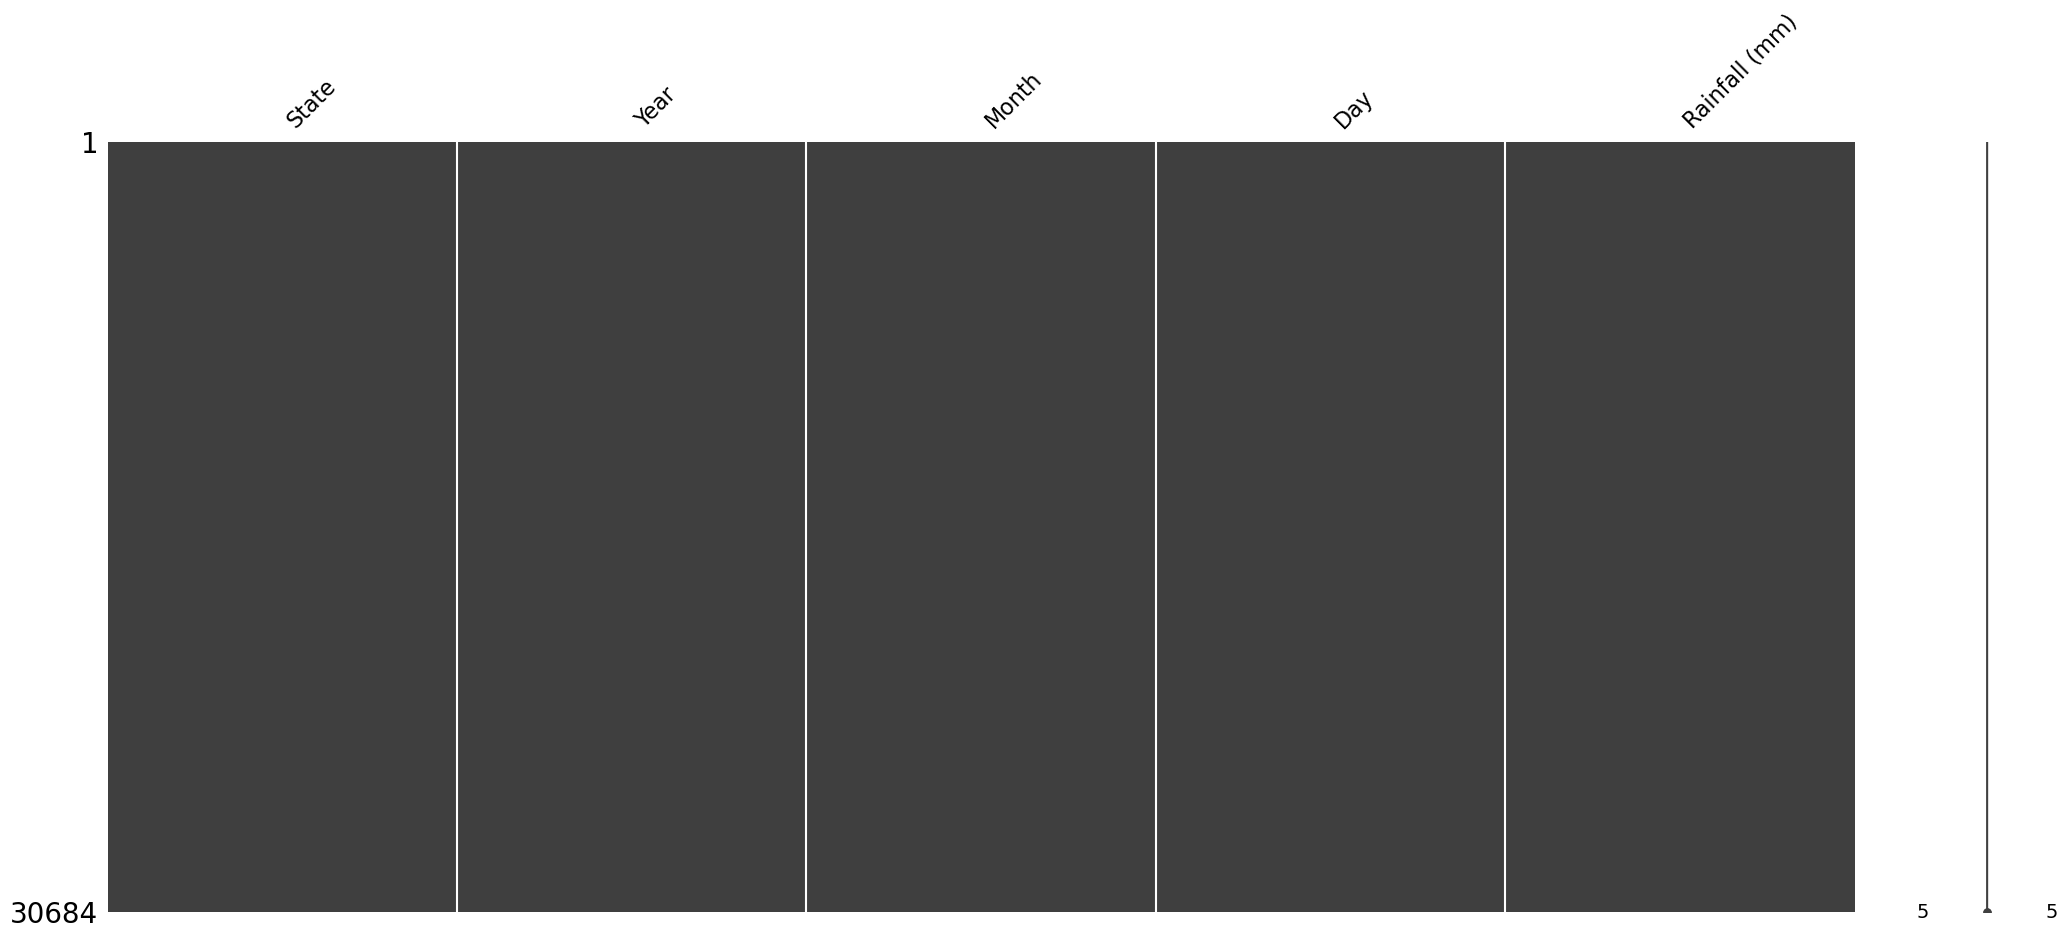

In [9]:
print("Checking method1 for any missing values...")
MissingMatrix(method1)
plt.show()
print()
print("Checking method2 for any missing values...")
MissingMatrix(method2)
plt.show()
print()
print("Checking method3 for any missing values...")
MissingMatrix(method3)
plt.show()

Perfect. No missing values detected in these data. Now we can straight away to do other data cleaning methods instead of dealing with missing values first.

[Back to Table of Contents](#T)

<a id="S3"></a>
### Step 3 - Summary of the Extracted Data

<a id="S3_1"></a>
#### Part 1 - Summary of data structure using `info()`
Don't forget to check the data types (Dtype) and total noumber of rows (entries) for each data

In [10]:
method1.info()
print()
method2.info()
print()
method3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          30684 non-null  object 
 1   Year           30684 non-null  int64  
 2   Month          30684 non-null  int64  
 3   Day            30684 non-null  int64  
 4   Rainfall (mm)  30684 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          30684 non-null  object 
 1   Year           30684 non-null  int64  
 2   Month          30684 non-null  int64  
 3   Day            30684 non-null  int64  
 4   Rainfall (mm)  30684 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
Rang

<a id="S3_2"></a>
#### Part 2 - Statistics Summary
View the summary of the data analysis for the data by using the Pandas command `.describe()` and the statsmodels function `desc` imported before

In [11]:
method1.describe()

Year         Month           Day  Rainfall (mm)
count  30684.000000  30684.000000  30684.000000   30684.000000
mean    2017.000782      6.522487     15.730935       2.221187
std        2.000228      3.448881      8.800783       7.600286
min     2014.000000      1.000000      1.000000       0.000000
25%     2015.000000      4.000000      8.000000       0.010000
50%     2017.000000      7.000000     16.000000       0.170000
75%     2019.000000     10.000000     23.000000       1.260000
max     2020.000000     12.000000     31.000000     336.760000

In [12]:
desc(method1)

Year         Month           Day  Rainfall (mm)
nobs              30684.000000  30684.000000  30684.000000   3.068400e+04
missing               0.000000      0.000000      0.000000   0.000000e+00
mean               2017.000782      6.522487     15.730935   2.221187e+00
std_err               0.000065      0.000112      0.000287   2.476954e-04
upper_ci           2017.000910      6.522708     15.731497   2.221672e+00
lower_ci           2017.000654      6.522267     15.730373   2.220701e+00
std                   2.000228      3.448881      8.800783   7.600286e+00
iqr                   4.000000      6.000000     15.000000   1.250000e+00
iqr_normal            2.965204      4.447807     11.119517   9.266264e-01
mad                   1.714621      2.994162      7.619067   3.096713e+00
mad_normal            2.148959      3.752626      9.549085   3.881155e+00
coef_var              0.000992      0.528768      0.559457   3.421723e+00
range                 6.000000     11.000000     30.000000   3.367600e+02
max                2020.000000     12.000000     31.000000   3.367600e+02
min                2014.000000      1.000000      1.000000   0.000000e+00
skew                  0.000098     -0.009128      0.006651   1.297387e+01
kurtosis              1.749951      1.791800      1.805845   3.509647e+02
jarque_bera        1997.814414   1866.711446   1823.375679   1.556609e+08
jarque_bera_pval      0.000000      0.000000      0.000000   0.000000e+00
mode               2016.000000      1.000000      1.000000   0.000000e+00
mode_freq             0.143136      0.084865      0.032851   2.356603e-01
median             2017.000000      7.000000     16.000000   1.700000e-01

In [13]:
method2.describe()

Year         Month           Day  Rainfall (mm)
count  30684.000000  30684.000000  30684.000000   30684.000000
mean    2017.000782      6.522487     15.730935       6.001241
std        2.000228      3.448881      8.800783      10.602212
min     2014.000000      1.000000      1.000000       0.000000
25%     2015.000000      4.000000      8.000000       0.460000
50%     2017.000000      7.000000     16.000000       2.610000
75%     2019.000000     10.000000     23.000000       7.530000
max     2020.000000     12.000000     31.000000     354.380000

In [14]:
desc(method2)

Year         Month           Day  Rainfall (mm)
nobs              30684.000000  30684.000000  30684.000000   3.068400e+04
missing               0.000000      0.000000      0.000000   0.000000e+00
mean               2017.000782      6.522487     15.730935   6.001241e+00
std_err               0.000065      0.000112      0.000287   3.455290e-04
upper_ci           2017.000910      6.522708     15.731497   6.001918e+00
lower_ci           2017.000654      6.522267     15.730373   6.000564e+00
std                   2.000228      3.448881      8.800783   1.060221e+01
iqr                   4.000000      6.000000     15.000000   7.070000e+00
iqr_normal            2.965204      4.447807     11.119517   5.240999e+00
mad                   1.714621      2.994162      7.619067   5.987748e+00
mad_normal            2.148959      3.752626      9.549085   7.504529e+00
coef_var              0.000992      0.528768      0.559457   1.766670e+00
range                 6.000000     11.000000     30.000000   3.543800e+02
max                2020.000000     12.000000     31.000000   3.543800e+02
min                2014.000000      1.000000      1.000000   0.000000e+00
skew                  0.000098     -0.009128      0.006651   7.490833e+00
kurtosis              1.749951      1.791800      1.805845   1.286935e+02
jarque_bera        1997.814414   1866.711446   1823.375679   2.048579e+07
jarque_bera_pval      0.000000      0.000000      0.000000   0.000000e+00
mode               2016.000000      1.000000      1.000000   0.000000e+00
mode_freq             0.143136      0.084865      0.032851   5.067788e-02
median             2017.000000      7.000000     16.000000   2.610000e+00

In [15]:
method3.describe()

Year         Month           Day  Rainfall (mm)
count  30684.000000  30684.000000  30684.000000   30684.000000
mean    2017.000782      6.522487     15.730935       5.635400
std        2.000228      3.448881      8.800783       7.207723
min     2014.000000      1.000000      1.000000       0.000000
25%     2015.000000      4.000000      8.000000       1.380000
50%     2017.000000      7.000000     16.000000       3.450000
75%     2019.000000     10.000000     23.000000       7.130000
max     2020.000000     12.000000     31.000000     161.530000

In [16]:
desc(method3)

Year         Month           Day  Rainfall (mm)
nobs              30684.000000  30684.000000  30684.000000   3.068400e+04
missing               0.000000      0.000000      0.000000   0.000000e+00
mean               2017.000782      6.522487     15.730935   5.635400e+00
std_err               0.000065      0.000112      0.000287   2.349017e-04
upper_ci           2017.000910      6.522708     15.731497   5.635861e+00
lower_ci           2017.000654      6.522267     15.730373   5.634940e+00
std                   2.000228      3.448881      8.800783   7.207723e+00
iqr                   4.000000      6.000000     15.000000   5.750000e+00
iqr_normal            2.965204      4.447807     11.119517   4.262481e+00
mad                   1.714621      2.994162      7.619067   4.586691e+00
mad_normal            2.148959      3.752626      9.549085   5.748565e+00
coef_var              0.000992      0.528768      0.559457   1.279008e+00
range                 6.000000     11.000000     30.000000   1.615300e+02
max                2020.000000     12.000000     31.000000   1.615300e+02
min                2014.000000      1.000000      1.000000   0.000000e+00
skew                  0.000098     -0.009128      0.006651   4.164669e+00
kurtosis              1.749951      1.791800      1.805845   4.060885e+01
jarque_bera        1997.814414   1866.711446   1823.375679   1.897043e+06
jarque_bera_pval      0.000000      0.000000      0.000000   0.000000e+00
mode               2016.000000      1.000000      1.000000   0.000000e+00
mode_freq             0.143136      0.084865      0.032851   2.102073e-02
median             2017.000000      7.000000     16.000000   3.450000e+00

[Back to Table of Contents](#T)

<a id="S4"></a>
### Step 4 - Data Cleaning/Manipulation

<a id="S4_1"></a>
#### Part 1 - Creating `Date` column
Use Pandas code `df['Date'] = pd.to_datetime(df[['Year','Month','Day']])` to combine the columns `Year`, `Month` and `Day` into a single column `Date`

In [17]:
method1['Date'] = pd.to_datetime(method1[['Year','Month','Day']])
method2['Date'] = pd.to_datetime(method2[['Year','Month','Day']])
method3['Date'] = pd.to_datetime(method3[['Year','Month','Day']])

method1.info()
print()
method2.info()
print()
method3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          30684 non-null  object        
 1   Year           30684 non-null  int64         
 2   Month          30684 non-null  int64         
 3   Day            30684 non-null  int64         
 4   Rainfall (mm)  30684 non-null  float64       
 5   Date           30684 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          30684 non-null  object        
 1   Year           30684 non-null  int64         
 2   Month          30684 non-null  int64         
 3   Day            30684 non-null  int

<a id="S4_2"></a>
#### Part 2 - Restructuring the dataframe
Rearrange the columns to only contain `State`, `Date` and `Rainfall (mm)`

In [18]:
method1 = method1[["State","Date","Rainfall (mm)"]]
method2 = method2[["State","Date","Rainfall (mm)"]]
method3 = method3[["State","Date","Rainfall (mm)"]]

method1.info()
print()
method2.info()
print()
method3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          30684 non-null  object        
 1   Date           30684 non-null  datetime64[ns]
 2   Rainfall (mm)  30684 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 719.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          30684 non-null  object        
 1   Date           30684 non-null  datetime64[ns]
 2   Rainfall (mm)  30684 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 719.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 3 columns):
 #   Column       

[Back to Table of Contents](#T)

<a id="S4_3"></a>
#### Part 3 - Combine the data into a single dataframe
Combining all the 3 DataFrames (of Method 1, Method 2, and Method 3) into a single DataFrame using the Pandas command `pd.merge()` with both `left_on` and `right_on` refer to `["State","Date"]`.
This is to ensure the data joins into a single DataFrame with matching "State" and "Date"

In [19]:
rainfalls_temp = pd.merge(method1, method2, left_on=["State","Date"], right_on=["State","Date"])
rainfalls_temp

State       Date  Rainfall (mm)_x  Rainfall (mm)_y
0           Johor 2014-01-01             0.19             4.37
1           Johor 2014-01-02             1.73             2.53
2           Johor 2014-01-03             2.20             9.31
3           Johor 2014-01-04             1.27             8.56
4           Johor 2014-01-05             0.85             5.24
...           ...        ...              ...              ...
30679  Terengganu 2020-12-27             0.28            23.66
30680  Terengganu 2020-12-28             0.09            46.57
30681  Terengganu 2020-12-29             0.05           127.16
30682  Terengganu 2020-12-30             0.11            10.45
30683  Terengganu 2020-12-31             2.04            17.85

[30684 rows x 4 columns]

In [20]:
rainfalls = pd.merge(rainfalls_temp, method3, left_on=["State","Date"], right_on=["State","Date"])
rainfalls

State       Date  Rainfall (mm)_x  Rainfall (mm)_y  Rainfall (mm)
0           Johor 2014-01-01             0.19             4.37           5.74
1           Johor 2014-01-02             1.73             2.53           7.47
2           Johor 2014-01-03             2.20             9.31          14.33
3           Johor 2014-01-04             1.27             8.56          32.75
4           Johor 2014-01-05             0.85             5.24          21.56
...           ...        ...              ...              ...            ...
30679  Terengganu 2020-12-27             0.28            23.66          21.96
30680  Terengganu 2020-12-28             0.09            46.57          16.44
30681  Terengganu 2020-12-29             0.05           127.16          16.81
30682  Terengganu 2020-12-30             0.11            10.45          16.08
30683  Terengganu 2020-12-31             2.04            17.85          16.42

[30684 rows x 5 columns]

Renaming the column names using the Pandas command `df.rename(columns={"original name of the column":"new name for the column"})`...

In [21]:
rainfalls = rainfalls.rename(columns={"Rainfall (mm)_x":"Method_1_CCSM", "Rainfall (mm)_y":"Method_2_ECHM", "Rainfall (mm)":"Method_3_MRIB"})
rainfalls

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
0           Johor 2014-01-01           0.19           4.37           5.74
1           Johor 2014-01-02           1.73           2.53           7.47
2           Johor 2014-01-03           2.20           9.31          14.33
3           Johor 2014-01-04           1.27           8.56          32.75
4           Johor 2014-01-05           0.85           5.24          21.56
...           ...        ...            ...            ...            ...
30679  Terengganu 2020-12-27           0.28          23.66          21.96
30680  Terengganu 2020-12-28           0.09          46.57          16.44
30681  Terengganu 2020-12-29           0.05         127.16          16.81
30682  Terengganu 2020-12-30           0.11          10.45          16.08
30683  Terengganu 2020-12-31           2.04          17.85          16.42

[30684 rows x 5 columns]

[Back to Table of Contents](#T)

<a id="S4_4"></a>
#### Part 4 - Extracting the data for Selangor state only

Listing out the States using the `rainfalls["State"].unique()` command gives us<b>:</b>

In [22]:
states = list(rainfalls["State"].unique())
states

['Johor',
 'Kedah',
 'Kelantan',
 'Melaka',
 'NSembilan',
 'Pahang',
 'Penang',
 'Perak',
 'Perlis',
 'Selangor',
 'Selangor-Wilayah',
 'Terengganu']

Getting the index numbers for `rainfalls[State] == "Selangor"` by using the `.groupby(rainfalls["State]").head()` and `.groupby(rainfalls["State]").tail()`

In [23]:
rainfalls[rainfalls["State"] == "Selangor"]

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
23013  Selangor 2014-01-01           0.06           6.96           4.54
23014  Selangor 2014-01-02           0.41           5.38           0.95
23015  Selangor 2014-01-03           1.97           4.75           0.94
23016  Selangor 2014-01-04           1.03           6.70           0.38
23017  Selangor 2014-01-05           0.11          13.47           7.79
...         ...        ...            ...            ...            ...
25565  Selangor 2020-12-27           0.02           2.21           4.90
25566  Selangor 2020-12-28           0.02           3.25           4.35
25567  Selangor 2020-12-29           0.02           3.09           5.93
25568  Selangor 2020-12-30           0.02           0.34           3.01
25569  Selangor 2020-12-31           0.03           1.53           2.13

[2557 rows x 5 columns]

obtaining the dataframe for the Selangor state only...

In [24]:
# We are only intereseted for the Selangor state
rainfalls_Selangor = rainfalls.loc[23013:25569].reset_index(drop=True)
rainfalls_Selangor

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
0     Selangor 2014-01-01           0.06           6.96           4.54
1     Selangor 2014-01-02           0.41           5.38           0.95
2     Selangor 2014-01-03           1.97           4.75           0.94
3     Selangor 2014-01-04           1.03           6.70           0.38
4     Selangor 2014-01-05           0.11          13.47           7.79
...        ...        ...            ...            ...            ...
2552  Selangor 2020-12-27           0.02           2.21           4.90
2553  Selangor 2020-12-28           0.02           3.25           4.35
2554  Selangor 2020-12-29           0.02           3.09           5.93
2555  Selangor 2020-12-30           0.02           0.34           3.01
2556  Selangor 2020-12-31           0.03           1.53           2.13

[2557 rows x 5 columns]

<a id="S4_E"></a>
#### <i>Extra - Extracting overall data by mean values i.e. Peninsular Malaysia</i>
To extract the mean values of the overall data (in which represents Peninsular Malaysia), uncomment the following codes by pressing `Ctrl` + `/` (for Windows users) on the codes.

In [ ]:
# # creating a dataframe for the overall data i.e. peninsular Malaysia by mean values
# rainfalls_peninsular = rainfalls.groupby(rainfalls["Date"]).mean().reset_index()

# # rainfalls_peninsular["Time_Progress"] = pd.Series(np.zeros(len(rainfalls_peninsular)))
# # for i in range(len(rainfalls_peninsular)):
# #     rainfalls_peninsular.loc[i:,"Time_Progress"] = i+1

# # rainfalls_peninsular["Time_Progress"] = rainfalls_peninsular["Time_Progress"].astype(int)
# rainfalls_peninsular

[Back to Table of Contents](#T)

<a id="S5"></a>
### Step 5 - Visualizing the Data
Visualize the data using `matplotlib` and `seaborn`

In [25]:
# defining a function to exectue the Matplotlib time series plots or Seaborn boxplots
def plots_Selangor(plot):
    if plot == "Time_Series":
        # time series plot on the predicted rainfalls for the Selangor state
        f1, ax1 = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,8))
        plt.suptitle("Time series plots on rainfalls prediction in Selangor for years 2014 to 2020", fontsize=15, y=0.92)
        rainfalls_Selangor.plot(x="Date", y="Method_1_CCSM", kind="line", ax=ax1[0], linewidth=1, color="C0")
        rainfalls_Selangor.plot(x="Date", y="Method_2_ECHM", kind="line", ax=ax1[1], linewidth=1, color="C1")
        rainfalls_Selangor.plot(x="Date", y="Method_3_MRIB", kind="line", ax=ax1[2], linewidth=1, color="C2")
        
        for i in range(3):
            ax1[i].set_ylabel("Rainfalls (mm)")

        ax1[2].set_xlabel("Year")
        plt.savefig("Time_Series_Rainfalls_Selangor.png")
        plt.show()
        
    
    elif plot == "Boxplot":
        # boxplot to show outliers
        f2, ax2 = plt.subplots(nrows=3,ncols=1, figsize=(16,11))
        
        plt.suptitle("Boxplots on rainfalls prediction in Selangor, 2014 to 2020", y=0.9, fontsize=15)
        sns.boxplot(data=rainfalls_Selangor, x="Method_1_CCSM", ax=ax2[0], color='C0')
        sns.boxplot(data=rainfalls_Selangor, x="Method_2_ECHM", ax=ax2[1], color='C1')
        sns.boxplot(data=rainfalls_Selangor, x="Method_3_MRIB", ax=ax2[2], color='C2')
        
        for i in range(3):
            ax2[i]

        plt.savefig("Boxplot_Rainfalls_Selangor.png")
        plt.show()
        
        
    else:
        return("For simplicity of this Notebook, only Time_Series plot or Boxplot are accepted as choice of plots. (:")

<a id="S5_1"></a>
#### Part 1 - Time Series Plots
As defined in the function `plots_Selangor` before, the time series plots are executed using the Matplotlib `.plot(kind="line")`

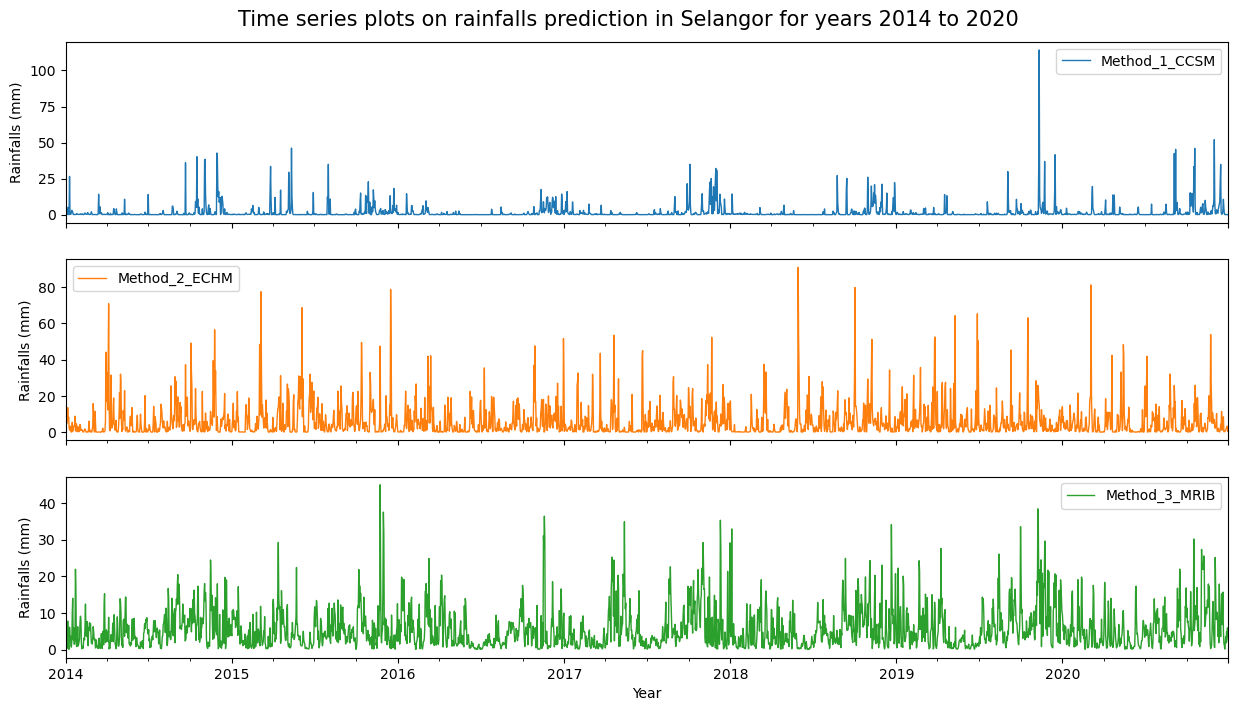

In [26]:
plots_Selangor("Time_Series")

<a id="S5_2"></a>
#### Part 2 - Boxplots
As defined in the function `plots_Selangor` before, the boxplots are executed using the Seaborn `sns.boxplot()`

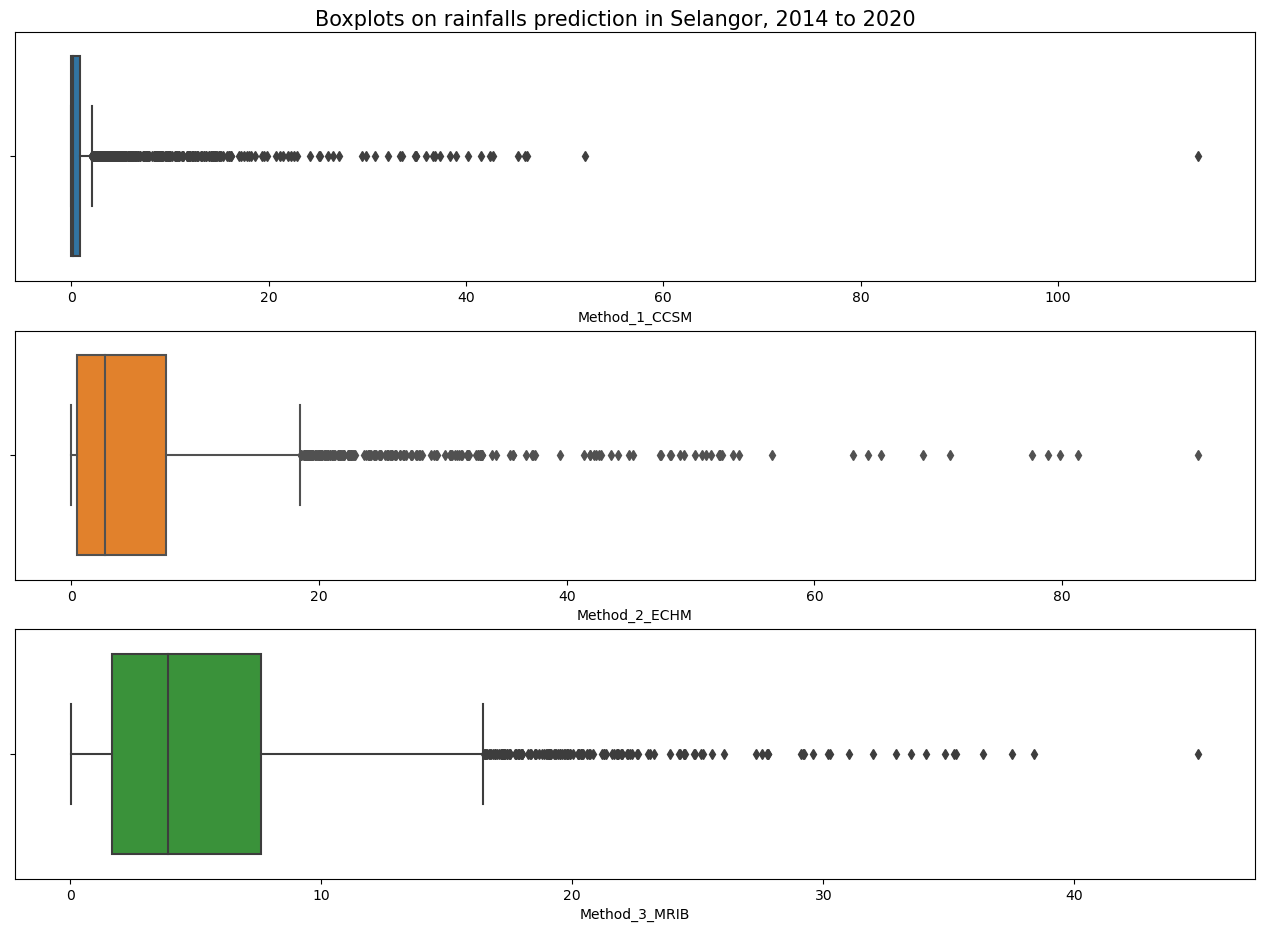

In [27]:
plots_Selangor("Boxplot")

[Back to Table of Contents](#T)

<a id="S5_E"></a>
#### <i>Extra - Visualizing the data for Peninsular Malaysia</i>
To run the visualization codes below for the mean data (Peninsular Malaysia), uncomment the following codes by pressing `Ctrl` + `/` (for Windows users) on the codes.

In [ ]:
# # defining the function for the plots
# def plots_Peninsular(plot):
#     if plot == "Time_Series":
#         # time series plot on the average rainfalls predicted for peninsular Malaysia
#         f3, ax3 = plt.subplots(nrows=3, ncols=1, figsize=(15,8))
#         plt.suptitle("Time series plots on average rainfalls prediction in peninsular Malaysia for years 2014 to 2020", fontsize=15)
#         rainfalls_peninsular.plot(y="Method_1_CCSM", kind="line", ax=ax3[0], linewidth=1, color="C0")
#         rainfalls_peninsular.plot(y="Method_2_ECHM", kind="line", ax=ax3[1], linewidth=1, color="C1")
#         rainfalls_peninsular.plot(y="Method_3_MRIB", kind="line", ax=ax3[2], linewidth=1, color="C2")
        
#         for i in range(3):
#             ax3[i].set_ylabel("Rainfalls (mm)")

#         ax3[2].set_xlabel("Year")
#         plt.show()
    
#     elif plot == "Boxplot":
#         # boxplot to show outliers
#         f4, ax4 = plt.subplots(nrows=3,ncols=1, figsize=(16,11))
        
#         plt.suptitle("Boxplots on average rainfalls prediction in peninsular Malaysia, 2014 to 2020", y=0.9, fontsize=15)
#         sns.boxplot(data=rainfalls_peninsular, x="Method_1_CCSM", ax=ax4[0], color='C0')
#         sns.boxplot(data=rainfalls_peninsular, x="Method_2_ECHM", ax=ax4[1], color='C1')
#         sns.boxplot(data=rainfalls_peninsular, x="Method_3_MRIB", ax=ax4[2], color='C2')
        
#         for i in range(3):
#             ax4[i]
        
#         plt.show()
        
#     else:
#         return("For simplicity of this Notebook, only Time_Series plot or Boxplot are accepted as choice of plots. (:")

In [ ]:
# plots_Peninsular("Time_Series")

In [ ]:
# plots_Peninsular("Boxplot")

[Back to Table of Contents](#T)

<a id="S6"></a>
### Step 6 - Dealing with Outliers

<a id="S6_1"></a>
#### Part 1 - Descriptive Statistics for Manual Detection
Outliers can be detected manually instead of plotting them by using the <u>Tukey's Method of Upper and Lower Fences</u>, which is a useful concept in descriptive statistics.

Since the boxplots before showing outliers on the 'upper' side of the data distribution, we will only <u>focus on Upper Fence</u> in this analysis.

In [28]:
# calculating descriptive statistics for the Selangor state only
# calculating the median for the data
median_Selangor_CCSM = rainfalls_Selangor["Method_1_CCSM"].median()
median_Selangor_ECHM = rainfalls_Selangor["Method_2_ECHM"].median()
median_Selangor_MRIB = rainfalls_Selangor["Method_3_MRIB"].median()

# calculating the 1st quantile for the data
q1_Selangor_CCSM = rainfalls_Selangor["Method_1_CCSM"].quantile(q=.25)
q1_Selangor_ECHM = rainfalls_Selangor["Method_2_ECHM"].quantile(q=.25)
q1_Selangor_MRIB = rainfalls_Selangor["Method_3_MRIB"].quantile(q=.25)

# calculating the 3rd quantile for the data
q3_Selangor_CCSM = rainfalls_Selangor["Method_1_CCSM"].quantile(q=.75)
q3_Selangor_ECHM = rainfalls_Selangor["Method_2_ECHM"].quantile(q=.75)
q3_Selangor_MRIB = rainfalls_Selangor["Method_3_MRIB"].quantile(q=.75)

# calculating the inter-quantile range for the data
iqr_Selangor_CCSM = iqr(rainfalls_Selangor["Method_1_CCSM"])
iqr_Selangor_ECHM = iqr(rainfalls_Selangor["Method_2_ECHM"])
iqr_Selangor_MRIB = iqr(rainfalls_Selangor["Method_3_MRIB"])

# calculating the upper fence (upper boundary for outliers)
uf_Selangor_CCSM = q3_Selangor_CCSM + (1.5 * iqr_Selangor_CCSM)
uf_Selangor_ECHM = q3_Selangor_ECHM + (1.5 * iqr_Selangor_ECHM)
uf_Selangor_MRIB = q3_Selangor_MRIB + (1.5 * iqr_Selangor_MRIB)

# display the median and upper fence values
print("Median, Method_1_CCSM = %.3f" % median_Selangor_CCSM)
print("Upper Fence, Method_1_CCSM = %.3f" % uf_Selangor_CCSM)
print("--------------------------------------")
print("Median, Method_2_ECHM = %.3f" % median_Selangor_ECHM)
print("Upper Fence, Method_2_ECHM = %.3f" % uf_Selangor_ECHM)
print("--------------------------------------")
print("Median, Method_3_MRIB = %.3f" % median_Selangor_MRIB)
print("Upper Fence, Method_3_MRIB = %.3f" % uf_Selangor_MRIB)

Median, Method_1_CCSM = 0.160
Upper Fence, Method_1_CCSM = 2.070
--------------------------------------
Median, Method_2_ECHM = 2.730
Upper Fence, Method_2_ECHM = 18.475
--------------------------------------
Median, Method_3_MRIB = 3.890
Upper Fence, Method_3_MRIB = 16.475


Displaying percentages of outliers among the data using the descriptive statistics method...

Thanks to `@nareshbhat` in the Kaggle.com Notebook entry [<b>Outlier!!! The Silent Killer</b>](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer) for the Python codes on manual detection of outliers

In [29]:
pct_outlier_CCSM = len(rainfalls_Selangor[rainfalls_Selangor["Method_1_CCSM"] > uf_Selangor_CCSM])/len(rainfalls_Selangor)*100
pct_outlier_ECHM = len(rainfalls_Selangor[rainfalls_Selangor["Method_2_ECHM"] > uf_Selangor_ECHM])/len(rainfalls_Selangor)*100
pct_outlier_MRIB = len(rainfalls_Selangor[rainfalls_Selangor["Method_3_MRIB"] > uf_Selangor_MRIB])/len(rainfalls_Selangor)*100

print(f"% outliers in rainfalls_Selangor_CCSM: {pct_outlier_CCSM:.2f}%")
print("----------------------------------------------")
print(f"% outliers in rainfalls_Selangor_ECHM: {pct_outlier_ECHM:.2f}%")
print("----------------------------------------------")
print(f"% outliers in rainfalls_Selangor_MRIB: {pct_outlier_MRIB:.2f}%")

% outliers in rainfalls_Selangor_CCSM: 15.60%
----------------------------------------------
% outliers in rainfalls_Selangor_ECHM: 7.59%
----------------------------------------------
% outliers in rainfalls_Selangor_MRIB: 5.51%


[Back to Table of Contents](#T)

<a id="S6_2"></a>
#### Part 2 - Removing the Outliers - Imputation with Median values
Since the data is a time series based, removing the outliers by <u>imputating them with median values</u> is a better option than simply removing them and leaving some timestamp with no data

Also thanks to `@nareshbhat` in the Kaggle.com Notebook entry [<b>Outlier!!! The Silent Killer</b>](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer) for the suggestions on the imputation technique with median to remove outliers

In [30]:
# selecting 50 as boundary for the obvious outliers as seen in the boxplot before
rainfalls_Selangor[rainfalls_Selangor["Method_1_CCSM"] > 50]

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
2140  Selangor 2019-11-11         114.23          15.50          21.78
2525  Selangor 2020-11-30          52.04           7.03           0.68

In [31]:
# executing the imputation with median values
for i in range(len(rainfalls_Selangor)):
    if (rainfalls_Selangor.loc[i,"Method_1_CCSM"] > 50):
        rainfalls_Selangor.loc[i,"Method_1_CCSM"] = median_Selangor_CCSM

In [32]:
# selecting 60 as boundary for the obvious outliers as seen in the boxplot before
rainfalls_Selangor[rainfalls_Selangor["Method_2_ECHM"] > 60]

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
94    Selangor 2014-04-05           0.01          70.91           8.79
429   Selangor 2015-03-06           0.01          77.55           6.92
519   Selangor 2015-06-04           0.02          68.76           1.02
714   Selangor 2015-12-16           1.87          78.86           3.48
1610  Selangor 2018-05-30           0.03          91.00           0.21
1735  Selangor 2018-10-02           0.11          79.86           2.14
1955  Selangor 2019-05-10           0.01          64.31           0.78
2004  Selangor 2019-06-28           0.12          65.34           1.17
2115  Selangor 2019-10-17           0.02          63.12           3.59
2254  Selangor 2020-03-04           0.31          81.29           8.00

In [33]:
# executing the imputation with median values
for j in range(len(rainfalls_Selangor)):
    if (rainfalls_Selangor.loc[j,"Method_2_ECHM"] > 60):
        rainfalls_Selangor.loc[j,"Method_2_ECHM"] = median_Selangor_ECHM

In [34]:
# selecting 40 as boundary for the obvious outliers as seen in the boxplot before
rainfalls_Selangor[rainfalls_Selangor["Method_3_MRIB"] > 40]

State       Date  Method_1_CCSM  Method_2_ECHM  Method_3_MRIB
691  Selangor 2015-11-23           2.41          47.51          44.95

In [35]:
# executing the imputation with median values
for k in range(len(rainfalls_Selangor)):
    if (rainfalls_Selangor.loc[k,"Method_3_MRIB"] > 40):
        rainfalls_Selangor.loc[k,"Method_3_MRIB"] = median_Selangor_ECHM

[Back to Table of Contents](#T)

<a id="S6_3"></a>
#### Part 3 - Visualizing the Edited Data
To clearly illustrate on whether the outliers are successfully removed by imputation using median values, we are plotting again the data after the removal process using the plotting functions defined in Step 5 before.

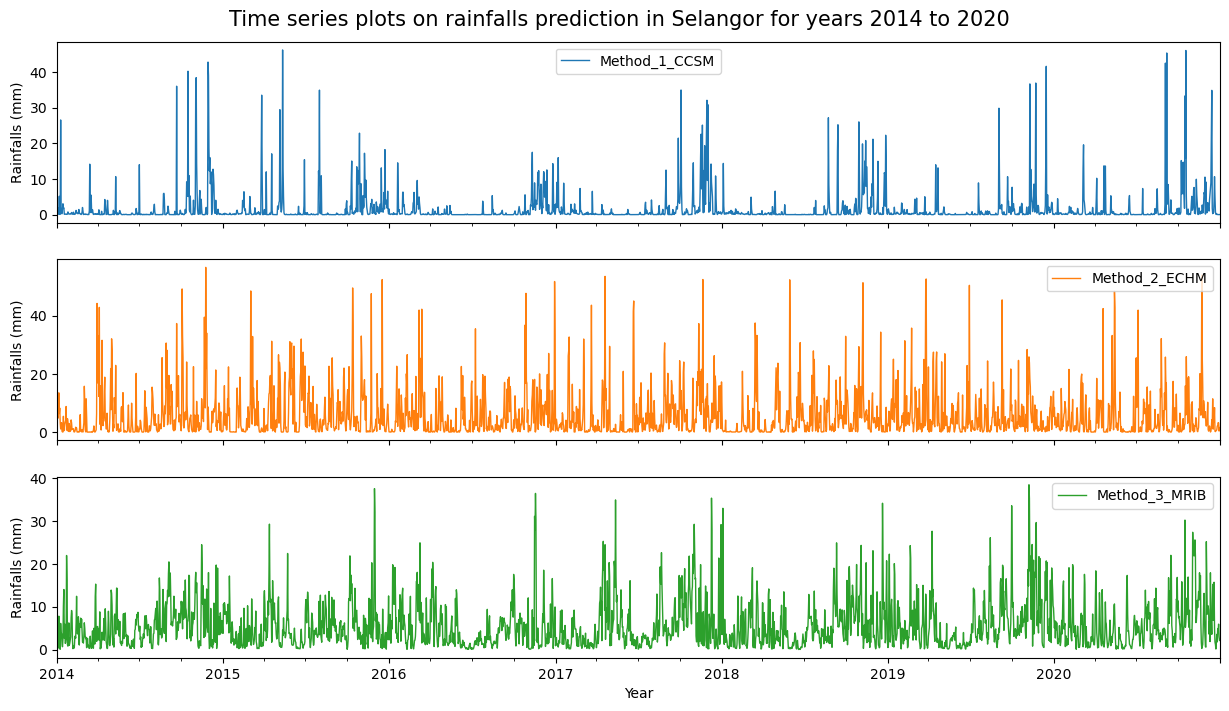

In [36]:
plots_Selangor("Time_Series")

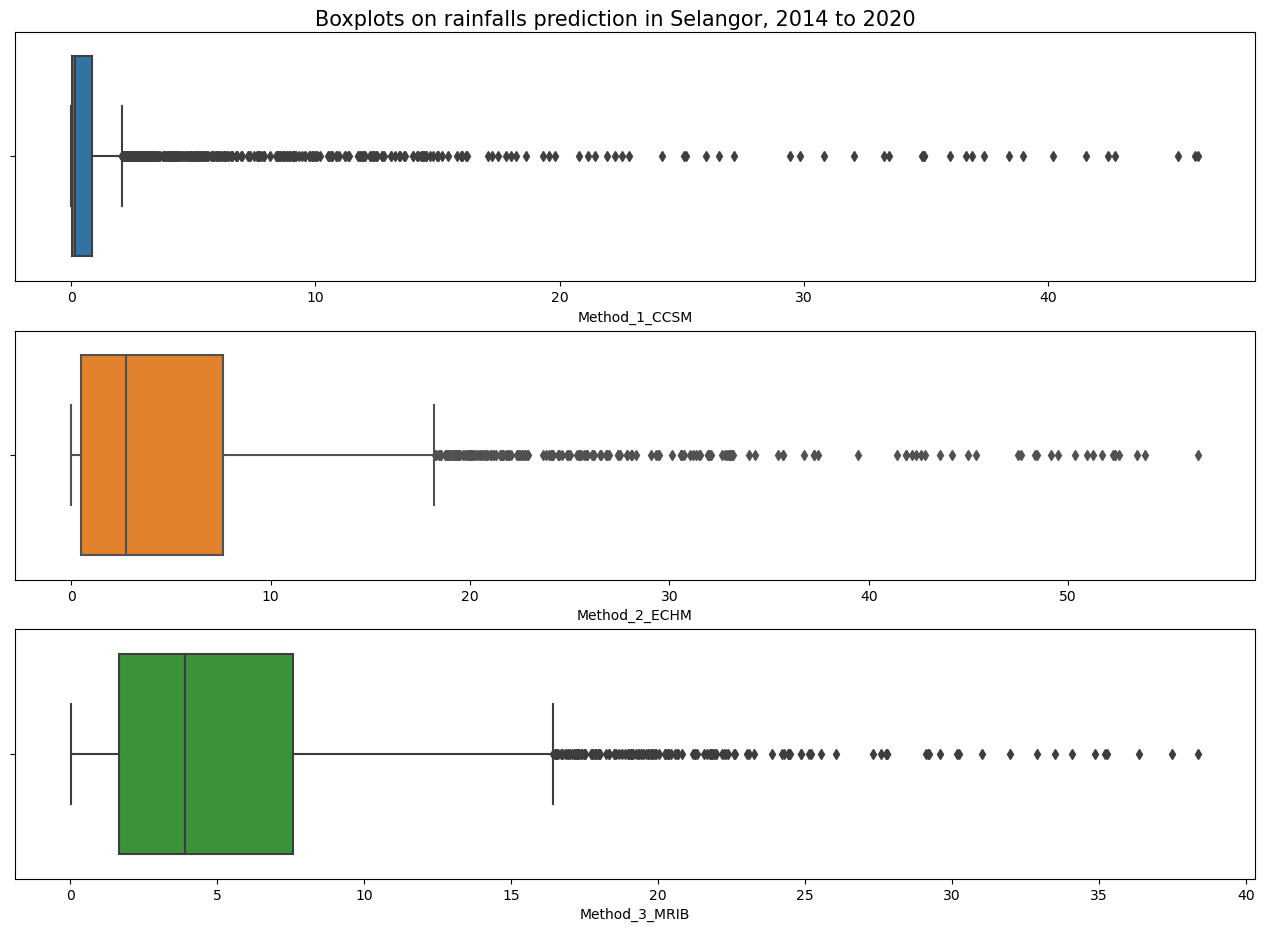

In [37]:
plots_Selangor("Boxplot")

[Back to Table of Contents](#T)

<a id="S6_E"></a>
#### <i>Extra - Dealing with outliers for the Peninsular Malaysia data</i>

In [ ]:
# # calculating descriptive statistics for the peninsular Malaysia
# # calculating median for the data
# median_peninsular_CCSM = rainfalls_peninsular["Method_1_CCSM"].median()
# median_peninsular_ECHM = rainfalls_peninsular["Method_2_ECHM"].median()
# median_peninsular_MRIB = rainfalls_peninsular["Method_3_MRIB"].median()

# # calculating the 1st quantile for the data
# q1_peninsular_CCSM = rainfalls_peninsular["Method_1_CCSM"].quantile(q=.25)
# q1_peninsular_ECHM = rainfalls_peninsular["Method_2_ECHM"].quantile(q=.25)
# q1_peninsular_MRIB = rainfalls_peninsular["Method_3_MRIB"].quantile(q=.25)

# # calculating the 3rd quantile for the data
# q3_peninsular_CCSM = rainfalls_peninsular["Method_1_CCSM"].quantile(q=.75)
# q3_peninsular_ECHM = rainfalls_peninsular["Method_2_ECHM"].quantile(q=.75)
# q3_peninsular_MRIB = rainfalls_peninsular["Method_3_MRIB"].quantile(q=.75)

# # calculating the inter-quantile range for the data
# iqr_peninsular_CCSM = iqr(rainfalls_peninsular["Method_1_CCSM"])
# iqr_peninsular_ECHM = iqr(rainfalls_peninsular["Method_2_ECHM"])
# iqr_peninsular_MRIB = iqr(rainfalls_peninsular["Method_3_MRIB"])

# # calculating the upper fence (upper boundary for outliers)
# uf_peninsular_CCSM = q3_peninsular_CCSM + (1.5 * iqr_peninsular_CCSM)
# uf_peninsular_ECHM = q3_peninsular_ECHM + (1.5 * iqr_peninsular_ECHM)
# uf_peninsular_MRIB = q3_peninsular_MRIB + (1.5 * iqr_peninsular_MRIB)

In [ ]:
# # executing the imputation with median values
# for i in range(len(rainfalls_peninsular)):
#     if (rainfalls_peninsular.loc[i,"Method_1_CCSM"] > uf_peninsular_CCSM):
#         rainfalls_peninsular.loc[i,"Method_1_CCSM"] = median_peninsular_CCSM

In [ ]:
# # executing the imputation with median values
# for j in range(len(rainfalls_peninsular)):
#     if (rainfalls_peninsular.loc[j,"Method_2_ECHM"] > uf_peninsular_ECHM):
#         rainfalls_peninsular.loc[j,"Method_2_ECHM"] = median_peninsular_ECHM

In [ ]:
# # executing the imputation with median values
# for k in range(len(rainfalls_peninsular)):
#     if (rainfalls_peninsular.loc[k,"Method_3_MRIB"] > uf_peninsular_MRIB):
#         rainfalls_peninsular.loc[k,"Method_3_MRIB"] = median_peninsular_ECHM

In [ ]:
# plots_Peninsular("Time_Series")

In [ ]:
# plots_Peninsular("Boxplot")

[Back to Table of Contents](#T)

<a id="S7"></a>
### Step 7 - EDA for Time Series
To obtain the best ARIMA model for the Time Series Forecasting, it is compulsory to conduct the Exploratory Data Analysis (EDA) first. This is because almost all parameters and conditions for building the model can be directly obtained from the EDA.

Thanks to `@iamleonie` in the Kaggle.com Notebook entry [<b>Intro to Time Series Forecasting</b>](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting) for the Python codes on the Time Series EDA in preparing the time series data for ARIMA model.

<a id="S7_1"></a>
#### Part 1 - Seasonal Decomposition plots

The time series can be decomposed into <u>four (4) major components</u>:
1. Level, or Observed values
2. Trend
3. Seasonal (Seasonality), and
4. Noise, or Residual values

The decomposition method is carried out using <u>either of these two (2) models</u>:
- Additive: $y(t) = Level(t) + Trend(t) + Seasonal(t) + Noise(t)$
<br>or
- Multiplicative: $y(t) = Level(t) \times Trend(t) \times Seasonal(t) \times Noise(t)$
<br> where $y(t)$ denotes the Time Series data

In Python, seasonal decomposition of time series can be carried out using the `seasonal_decomposition` function from the `statsmodels` library

In [38]:
# Decomposition of the Time Series for Trends, Seasonality and Noises/Residuals

def decompose_rainfalls_Selangor(col):
    decomp = seasonal_decompose(rainfalls_Selangor[col], period=365, model='additive', extrapolate_trend='freq')
    
    f4, ax4 = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))
    
    ax4[0].set_title(f"Decomposition of {col}", fontsize=15)
    decomp.observed.plot(ax=ax4[0], legend=False, color="dodgerblue", linewidth=1)
    ax4[0].set_ylabel("Observed")
    
    decomp.trend.plot(ax=ax4[1], legend=False, color="dodgerblue", linewidth=1)
    ax4[1].set_ylabel("Trend")
    
    decomp.seasonal.plot(ax=ax4[2], legend=False, color="dodgerblue", linewidth=1)
    ax4[2].set_ylabel("Seasonal")
    
    decomp.resid.plot(ax=ax4[3], legend=False, color="dodgerblue", linewidth=1)
    ax4[3].set_ylabel("Noise (Residuals)")
    
    for i in range(4):
        ax4[i]
    
    plt.xticks()
    ax4[3].set_xlabel("Time_Progress")
    plt.show()

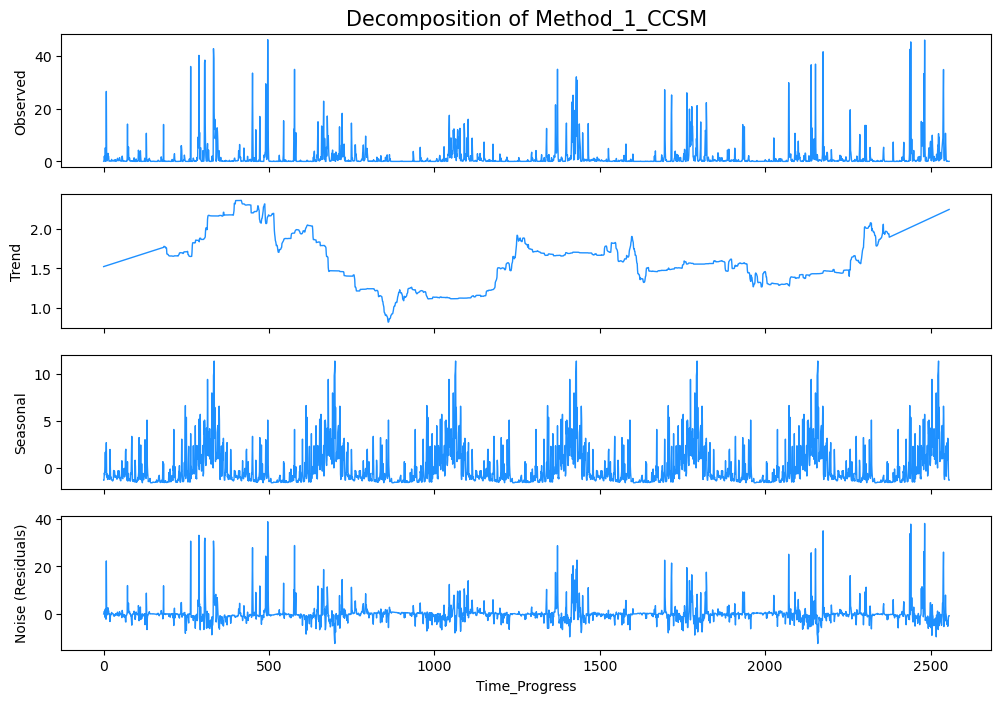

In [39]:
decompose_rainfalls_Selangor("Method_1_CCSM")

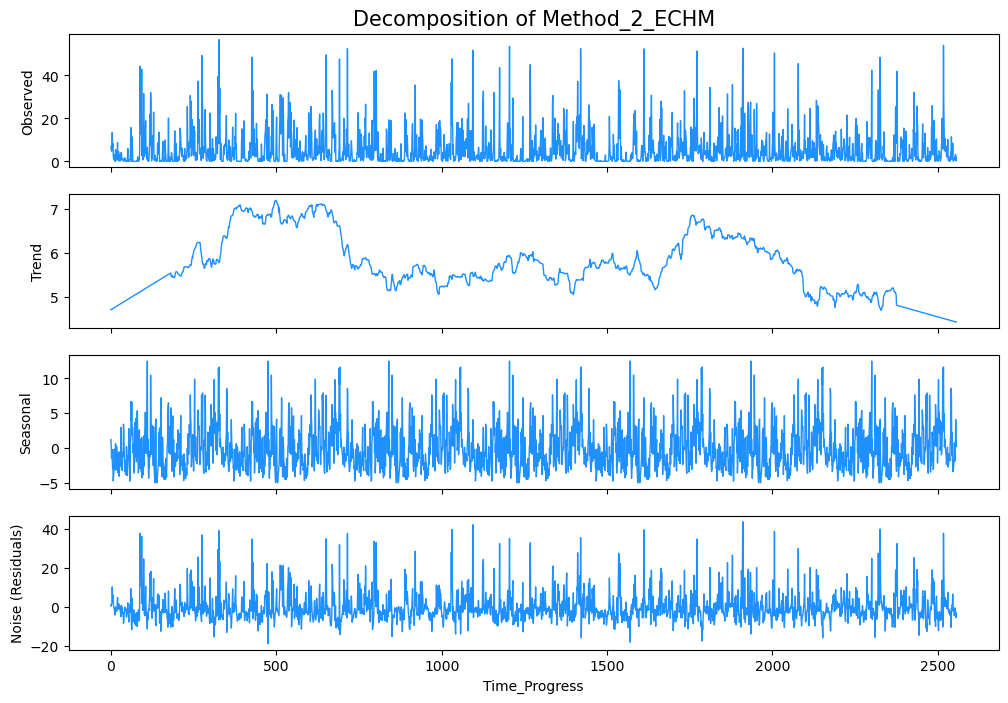

In [40]:
decompose_rainfalls_Selangor("Method_2_ECHM")

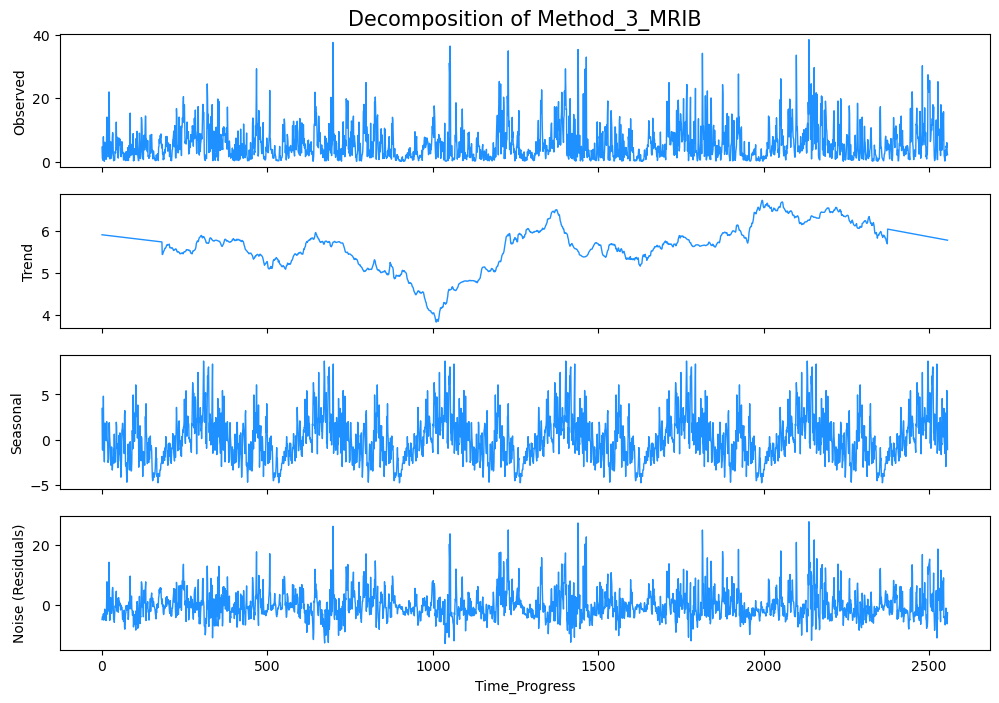

In [41]:
decompose_rainfalls_Selangor("Method_3_MRIB")

[Back to Table of Contents](#T)

<a id="S7_2"></a>
#### Part 2 - Checking for Stationary - Time Series plots with Rolling Mean & Rolling Standard Deviation

The assumption that must be made for any time series to be forecasted using the ARIMA model is that the time series data is stationary.

In this Notebook, two major tests will be run towards the time series data in the `rainfalls_Selangor` dataframe:

1. Time Series plots with Rolling Mean and Rolling Standard Deviation, Std. Dev.
>- Time series data is <b>stationary <u>if only both</u></b> Rolling Mean & Rolling Std. Dev <u>are horizontal straight lines</u> in the plot
>- else, where either one of them or both are not in horizontal straight lines, then the time series data is not stationary

2. Augmented Dickey-Fuller (ADF) Test
> ADF test utilizes the Hypothesis testing method with p-value as the benchmark for stationarity

The ADF test will be discussed further in the following [Part 3 of Step 7](#S7_3). For this Part 2 of Step 7, the Time Series plots with Rolling Mean and Rolling Std. Dev. will be focused first.

In [42]:
# visually check the timeseries for stationarity
# if rolling mean & rolling std. dev. both constant: timeseries is stationary
# else: timeseries is non-stationary

def plots_rolling(col):
    rolling_window = 365
    plt.figure(figsize=(12,8))
    sns.lineplot(x=rainfalls_Selangor["Date"], y=rainfalls_Selangor[col], color="indianred")
    sns.lineplot(x=rainfalls_Selangor["Date"], y=rainfalls_Selangor[col].rolling(rolling_window).mean(), color="black", label="rolling mean")
    sns.lineplot(x=rainfalls_Selangor["Date"], y=rainfalls_Selangor[col].rolling(rolling_window).std(), color="blue", label="rolling std. dev.")
    plt.title(f"Since both rolling mean and rolling std. dev. are not constant,\n{col} is non-stationary", fontsize=12)
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.show()

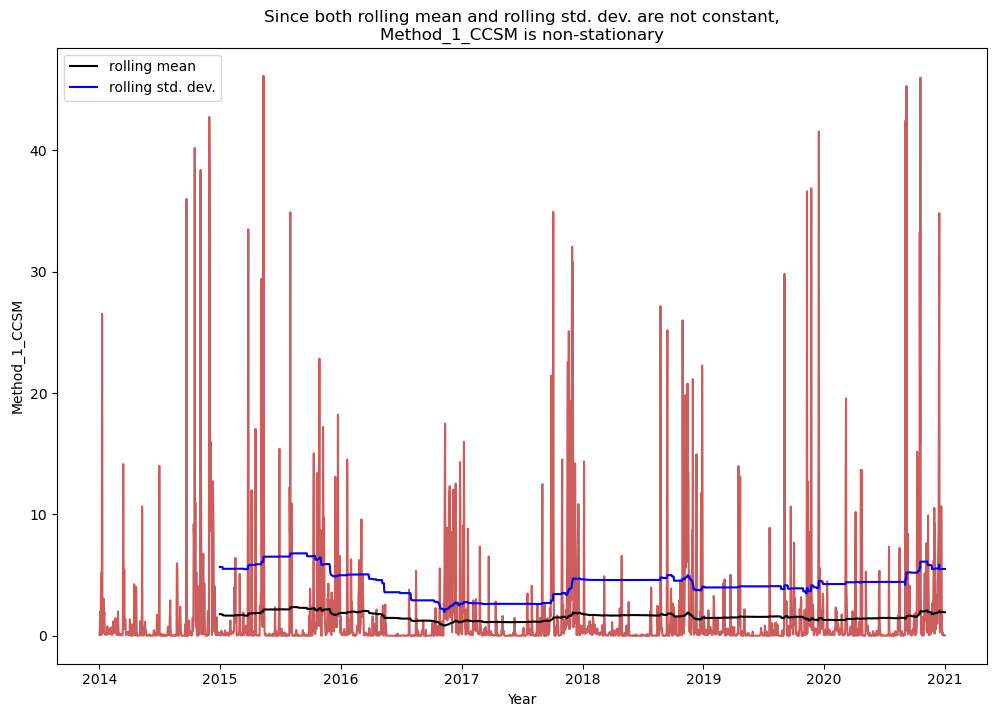

In [43]:
plots_rolling("Method_1_CCSM")

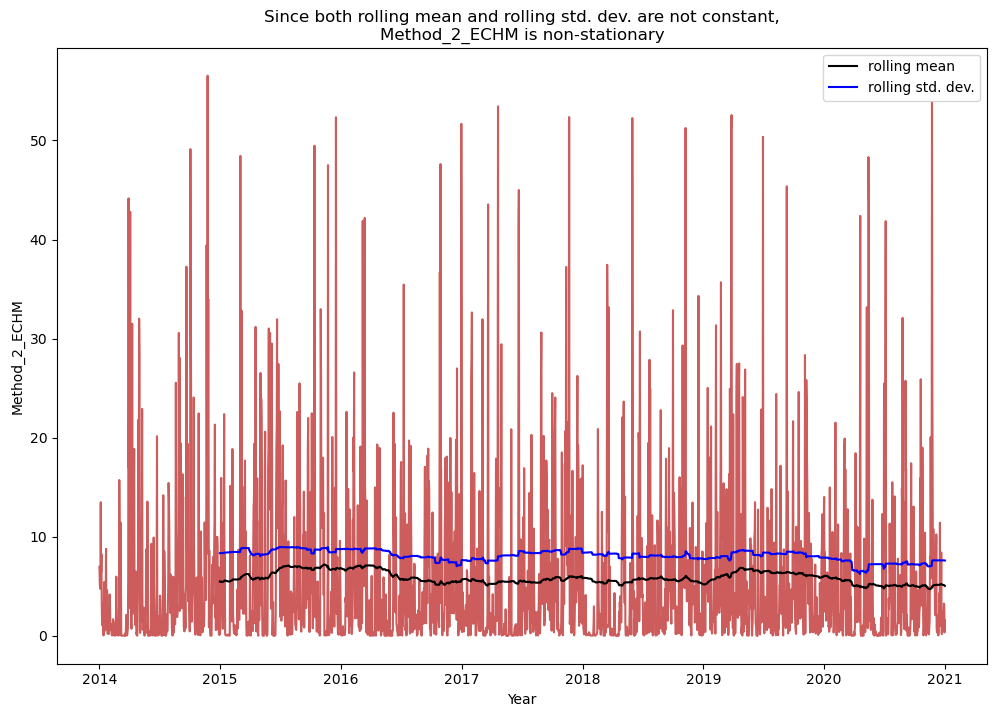

In [44]:
plots_rolling("Method_2_ECHM")

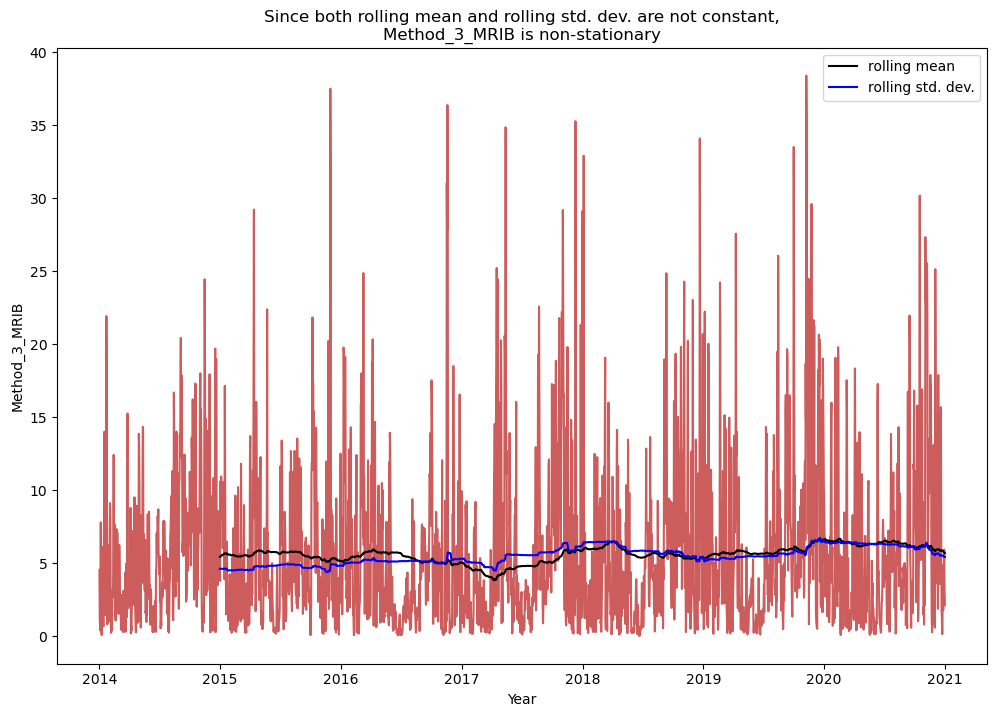

In [45]:
plots_rolling("Method_3_MRIB")

[Back to Table of Contents](#T)

<a id="S7_3"></a>
#### Part 3 - Checking for Stationary (continued) - Augmented Dickey-Fuller (ADF) test

As briefed in [Part 2 of Step 7](#S7_2) before, the second test to check whether the time series is stationary or not is the Augmented Dickey-Fuller (ADF) test.

The hypotheses drawn for this ADF test are:
>- <b>Null Hypothesis (H0)</b>: Time series is <u>not stationary</u> (where the time series have a unit root)
>- <b>Alternate Hypothesis (H1)</b>: Time series is stationary (where the time series does not have unit root)

The p-value benchmark to pick the hypothesis drawn above are as follows:
>- if <b>p-value $\le$ 0.05</b> : H0 is rejected, and proves that the <b>time series is stationary</b>.
>- else, where p-value $\gt$ 0.05 : Fail to reject H0, and <u>proves the otherwise</u>.

In [46]:
# Using Augmented Dickey-Fuller (ADF) test 
# to confirm the time series data is non-stationary

def adf_test_plot(col):
    f, ax = plt.subplots(figsize=(12,4))
    
    # carry out the ADF test
    result = ADF(rainfalls_Selangor[col])
    significance_level = 0.05
    adf_stat = result[0]
    p_value = result[1]
    critical_value_1 = result[4]["1%"]
    critical_value_5 = result[4]["5%"]
    critical_value_10 = result[4]["10%"]

    # if-elif-else loop to show the output of the ADF test based on graph color
    if (p_value < significance_level) & (adf_stat < critical_value_1):
        linecolor = "C2" # for v2.0 green color
    elif (p_value < significance_level) & (adf_stat < critical_value_5):
        linecolor = "gold"
    elif (p_value < significance_level) & (adf_stat < critical_value_10):
        linecolor = "C1" # for v2.0 orange color
    else:
        linecolor = "C3" # for v2.0 red color

    # visualize the ADF test output in a line plot
    sns.lineplot(data=rainfalls_Selangor, x="Date", y=col, ax=ax, color=linecolor, linewidth=1)
    plt.title(f"ADF Statistic = {adf_stat:0.3f}\
     | p-value = {p_value:0.3f}\
     \nCritical Values: 1% = {critical_value_1:0.3f}\
     | 5% = {critical_value_5:0.3f}\
     | 10% = {critical_value_10:0.3f}")
    plt.show()

    # summarize the ADF test output
    p_test = bool(p_value < significance_level)
    adf_test_1 = bool(adf_stat < critical_value_1)
    adf_test_5 = bool(adf_stat < critical_value_5)
    adf_test_10 = bool(adf_stat < critical_value_10)

    print("------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------")
    print("P-value < 0.05 : ",p_test)
    if p_test == True:
        print("Hence, H0 is REJECTED. Data series is stationary")
    else:
        print("Hence, H0 can't be rejected. Data series is non-stationary")
    print()
    print("ADF stats < Critical Values")
    print("1% : ",adf_test_1)
    print("5% : ",adf_test_5)
    print("10% : ",adf_test_10)
    if (adf_test_1 == True) & (adf_test_5 == True) & (adf_test_10 == True):
        print("Hence, H0 is REJECTED. Data series is stationary")
    else:
        print("Hence, H0 can't be rejected. Data series is non-stationary")
    print("----------------------------------------------------")

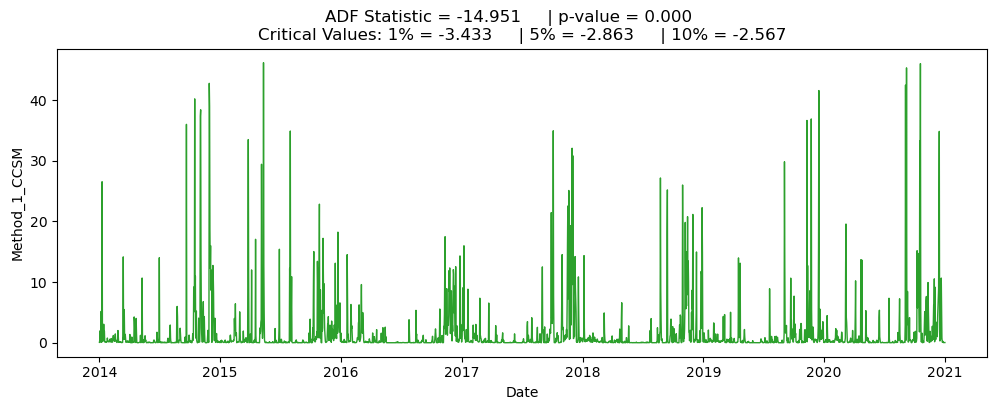

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------


In [47]:
adf_test_plot("Method_1_CCSM")

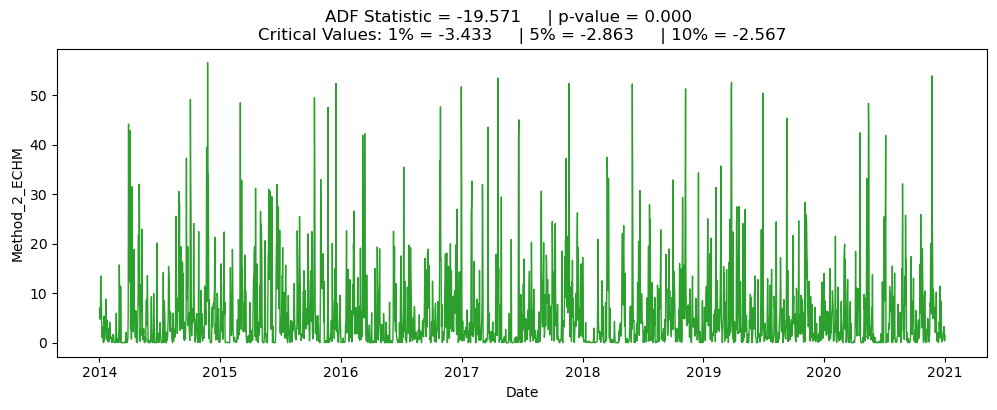

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------


In [48]:
adf_test_plot("Method_2_ECHM")

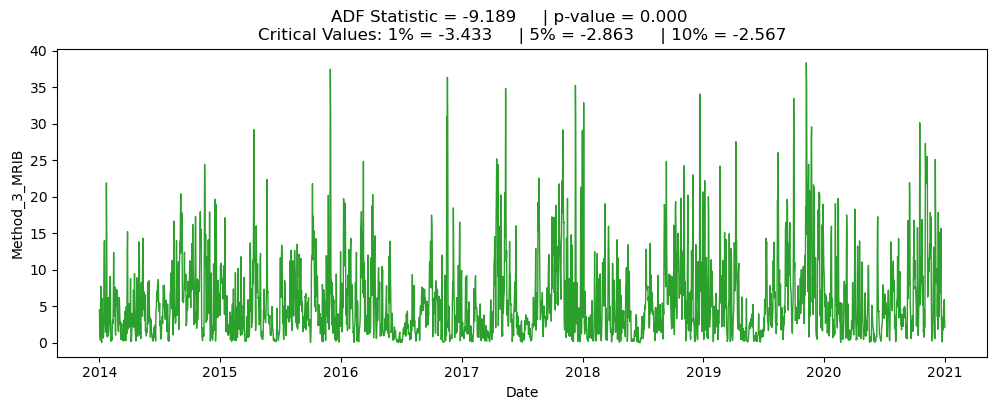

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------


In [49]:
adf_test_plot("Method_3_MRIB")

[Back to Table of Contents](#T)

<a id="S7_4"></a>
#### Part 4 - Regular Differencing

To convert a non-stationary time series data into stationary, one way is to transform the data by regular differencing. This regular differencing method is also a preparation for the data to be ready for the ARIMA forecasting.

The equation that explains this regular differencing method is as follows:

> 1st Order of Differencing: $y'_t = y_t - y_{t-1}$

> 2nd Order of Differencing: $y''_t = y'_t - y'_{t-1}$

and so on...

Thus, the general formula  is: 
$y^{(n)}_t = y^{(n-1)}_t - y^{(n-1)}_{t-1}$ [where: $n$ = order of differencing, and $t$ = time progress]

From this method, one of the parameters required to build the ARIMA model can be determined, which is the differencing value `d`.

In most cases, regular differencing stops at the 1st Order where the transformed data becomes stationary when tested using ADF test. And thus, the differencing value is usually taken at `d = 1` for the ARIMA model. 

However, another benchmark than can be used to indicate on which order should be stopped is by calculating the standard deviations for each differencing orders, and selecting the one with lowest standard deviations

> 1st Order Differencing on the Time series


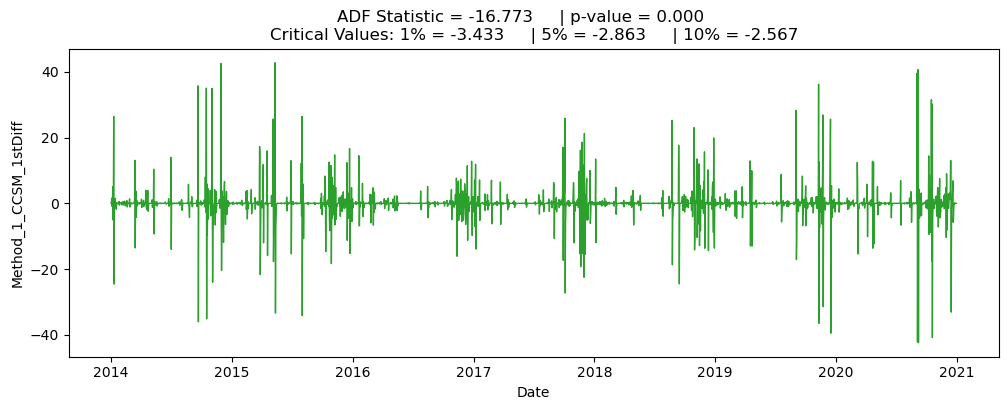

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 1st Order = 4.989



> 2nd Order Differencing on the Time series


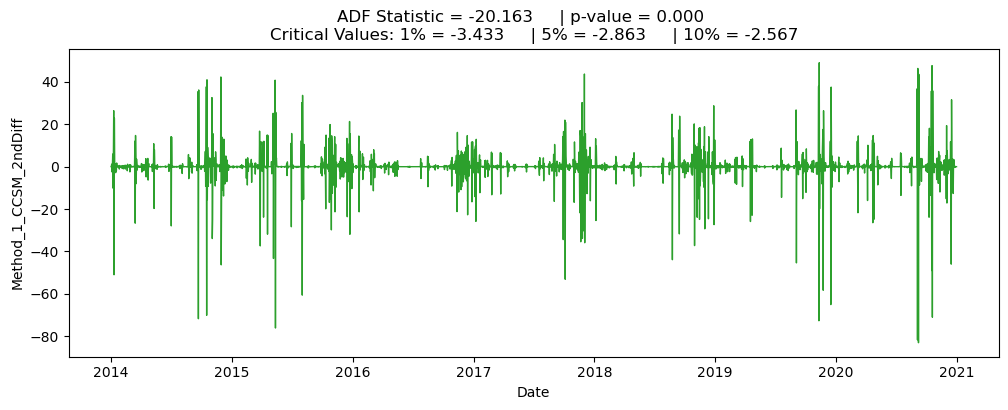

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 2nd Order = 8.199



> 3rd Order Differencing on the Time series


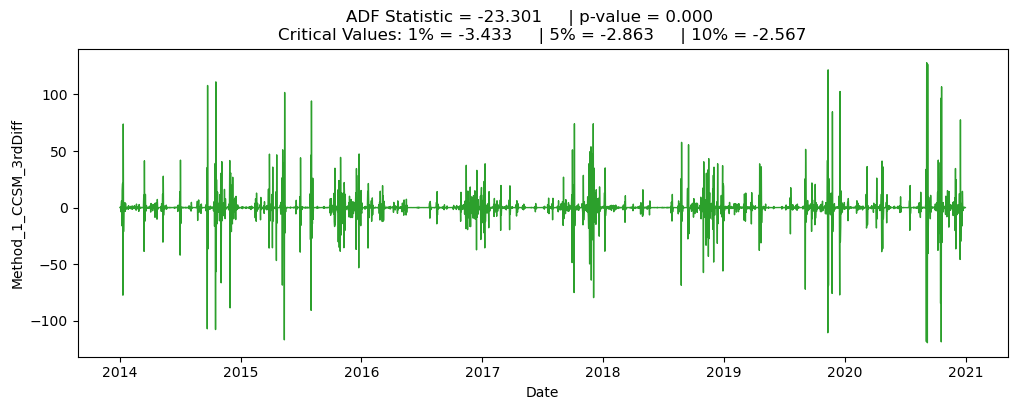

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 3rd Order = 14.609


In [50]:
# Conduct Differencing to prepare the time series data
# from non-stationary into stationary, and determine degree of differencing, d

# 1st Order Differencing
ts_diff_1 = np.diff(rainfalls_Selangor["Method_1_CCSM"])
rainfalls_Selangor["Method_1_CCSM_1stDiff"] = np.append(0, ts_diff_1)

# Visualize the Differencing effect
print("> 1st Order Differencing on the Time series")
adf_test_plot("Method_1_CCSM_1stDiff")
sd_1 = np.std(rainfalls_Selangor["Method_1_CCSM_1stDiff"])
print(f"Standard Deviation, 1st Order = {sd_1:.3f}")
print("\n\n")

# 2nd Order Differencing
ts_diff_2 = np.diff(rainfalls_Selangor["Method_1_CCSM_1stDiff"])
rainfalls_Selangor["Method_1_CCSM_2ndDiff"] = np.append(0, ts_diff_2)

# Visualize the Differencing effect
print("> 2nd Order Differencing on the Time series")
adf_test_plot("Method_1_CCSM_2ndDiff")
sd_2 = np.std(rainfalls_Selangor["Method_1_CCSM_2ndDiff"])
print(f"Standard Deviation, 2nd Order = {sd_2:.3f}")
print("\n\n")

# 3rd Order Differencing
ts_diff_3 = np.diff(rainfalls_Selangor["Method_1_CCSM_2ndDiff"])
rainfalls_Selangor["Method_1_CCSM_3rdDiff"] = np.append(0, ts_diff_3)

# Visualize the Differencing effect
print("> 3rd Order Differencing on the Time series")
adf_test_plot("Method_1_CCSM_3rdDiff")
sd_3 = np.std(rainfalls_Selangor["Method_1_CCSM_3rdDiff"])
print(f"Standard Deviation, 3rd Order = {sd_3:.3f}")

> 1st Order Differencing on the Time series


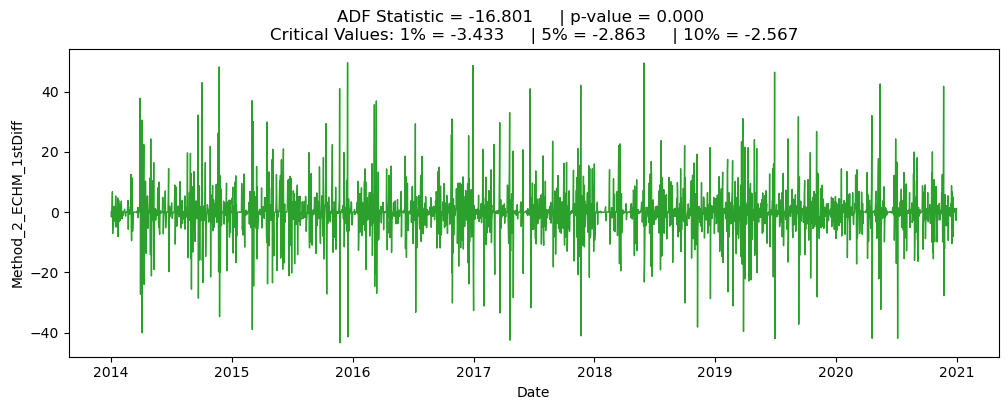

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 1st Order = 8.498



> 2nd Order Differencing on the Time series


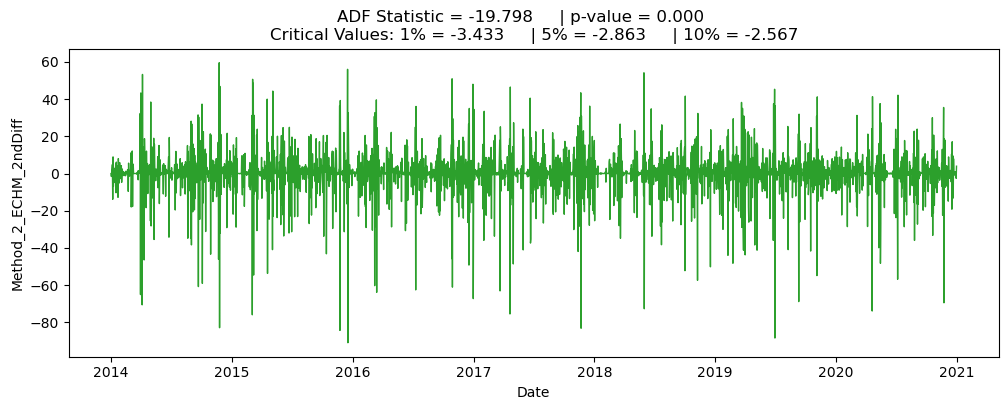

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 2nd Order = 13.635



> 3rd Order Differencing on the Time series


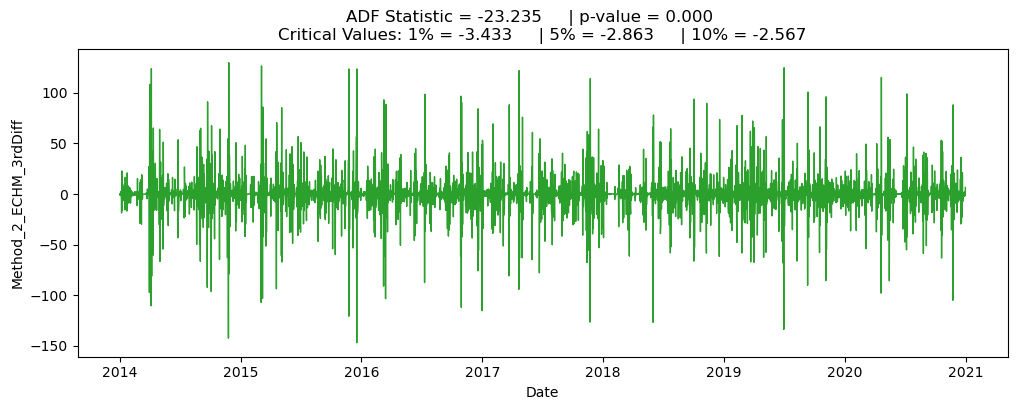

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 3rd Order = 24.097


In [51]:
# Conduct Differencing to prepare the time series data
# from non-stationary into stationary, and determine degree of differencing, d

# 1st Order Differencing
ts_diff_1 = np.diff(rainfalls_Selangor["Method_2_ECHM"])
rainfalls_Selangor["Method_2_ECHM_1stDiff"] = np.append(0, ts_diff_1)

# Visualize the Differencing effect
print("> 1st Order Differencing on the Time series")
adf_test_plot("Method_2_ECHM_1stDiff")
sd_1 = np.std(rainfalls_Selangor["Method_2_ECHM_1stDiff"])
print(f"Standard Deviation, 1st Order = {sd_1:.3f}")
print("\n\n")

# 2nd Order Differencing
ts_diff_2 = np.diff(rainfalls_Selangor["Method_2_ECHM_1stDiff"])
rainfalls_Selangor["Method_2_ECHM_2ndDiff"] = np.append(0, ts_diff_2)

# Visualize the Differencing effect
print("> 2nd Order Differencing on the Time series")
adf_test_plot("Method_2_ECHM_2ndDiff")
sd_2 = np.std(rainfalls_Selangor["Method_2_ECHM_2ndDiff"])
print(f"Standard Deviation, 2nd Order = {sd_2:.3f}")
print("\n\n")

# 3rd Order Differencing
ts_diff_3 = np.diff(rainfalls_Selangor["Method_2_ECHM_2ndDiff"])
rainfalls_Selangor["Method_2_ECHM_3rdDiff"] = np.append(0, ts_diff_3)

# Visualize the Differencing effect
print("> 3rd Order Differencing on the Time series")
adf_test_plot("Method_2_ECHM_3rdDiff")
sd_3 = np.std(rainfalls_Selangor["Method_2_ECHM_3rdDiff"])
print(f"Standard Deviation, 3rd Order = {sd_3:.3f}")

> 1st Order Differencing on the Time series


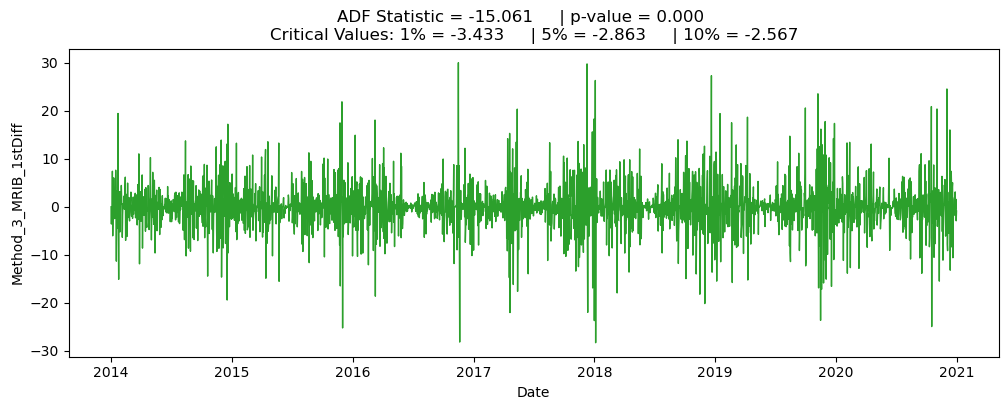

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 1st Order = 5.005



> 2nd Order Differencing on the Time series


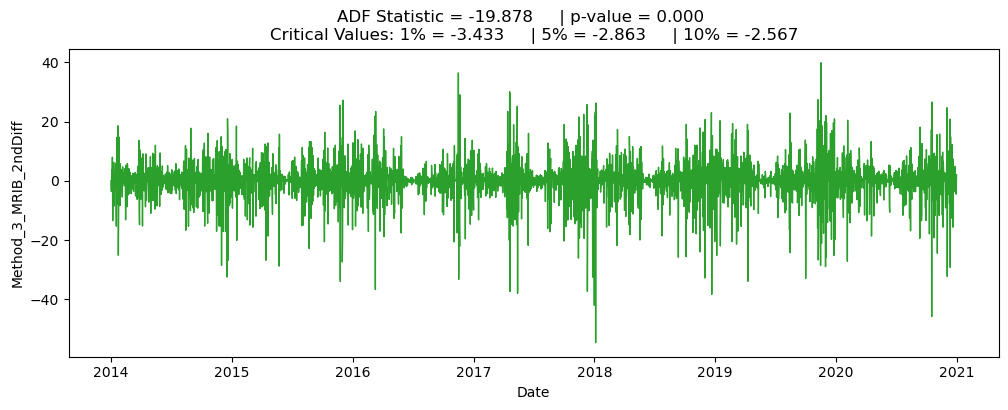

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 2nd Order = 7.834



> 3rd Order Differencing on the Time series


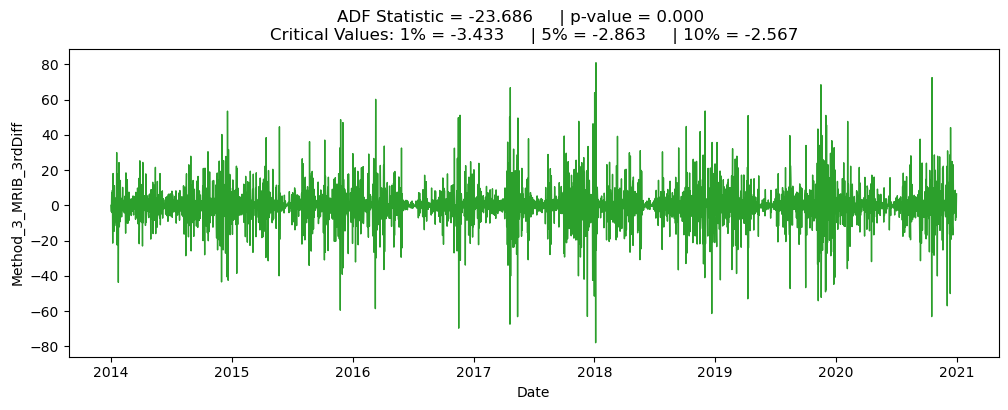

------SUMMARY ON AUGMENTED DICKEY-FUELLER TEST------
P-value < 0.05 :  True
Hence, H0 is REJECTED. Data series is stationary

ADF stats < Critical Values
1% :  True
5% :  True
10% :  True
Hence, H0 is REJECTED. Data series is stationary
----------------------------------------------------
Standard Deviation, 3rd Order = 13.686


In [52]:
# Conduct Differencing to prepare the time series data
# from non-stationary into stationary, and determine degree of differencing, d

# 1st Order Differencing
ts_diff_1 = np.diff(rainfalls_Selangor["Method_3_MRIB"])
rainfalls_Selangor["Method_3_MRIB_1stDiff"] = np.append(0, ts_diff_1)

# Visualize the Differencing effect
print("> 1st Order Differencing on the Time series")
adf_test_plot("Method_3_MRIB_1stDiff")
sd_1 = np.std(rainfalls_Selangor["Method_3_MRIB_1stDiff"])
print(f"Standard Deviation, 1st Order = {sd_1:.3f}")
print("\n\n")

# 2nd Order Differencing
ts_diff_2 = np.diff(rainfalls_Selangor["Method_3_MRIB_1stDiff"])
rainfalls_Selangor["Method_3_MRIB_2ndDiff"] = np.append(0, ts_diff_2)

# Visualize the Differencing effect
print("> 2nd Order Differencing on the Time series")
adf_test_plot("Method_3_MRIB_2ndDiff")
sd_2 = np.std(rainfalls_Selangor["Method_3_MRIB_2ndDiff"])
print(f"Standard Deviation, 2nd Order = {sd_2:.3f}")
print("\n\n")

# 3rd Order Differencing
ts_diff_3 = np.diff(rainfalls_Selangor["Method_3_MRIB_2ndDiff"])
rainfalls_Selangor["Method_3_MRIB_3rdDiff"] = np.append(0, ts_diff_3)

# Visualize the Differencing effect
print("> 3rd Order Differencing on the Time series")
adf_test_plot("Method_3_MRIB_3rdDiff")
sd_3 = np.std(rainfalls_Selangor["Method_3_MRIB_3rdDiff"])
print(f"Standard Deviation, 3rd Order = {sd_3:.3f}")

From the standard deviations benchmark, the 1st Order of regular differencing have the lowest values compared to the 2nd and 3rd Orders. Thus, it is confirmed and safe to say that the accepted parameter for ARIMA modelling later is `d = 1`.

[Back to Table of Contents](#T)

<a id="S7_5"></a>
#### Part 5 - Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

The final step of Time Series EDA is to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the time series data. This is to determine the rest two parameters for building the ARIMA model as follows:

- Number of lags for Auto-Regressive forecasting, `p`: determined from the PACF plot
- Number of lags for Moving Average forecasting, `q`: determined from the ACF plot

These numbers of lags can be determined directly from those plots by counting the points up until before entering the shaded region of repeating noises

In [53]:
def acf_pacf_plots(col):
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
    f.suptitle(f"ACF and PACF plots for rainfalls_Selangor, {col}", fontsize=15, y=0.93)
    plot_acf(rainfalls_Selangor[col], lags=100, ax=ax[0])
    plot_pacf(rainfalls_Selangor[col], lags=100, ax=ax[1])
    ax[0].set_xlabel("Lags")
    ax[1].set_xlabel("Lags")
    plt.show()

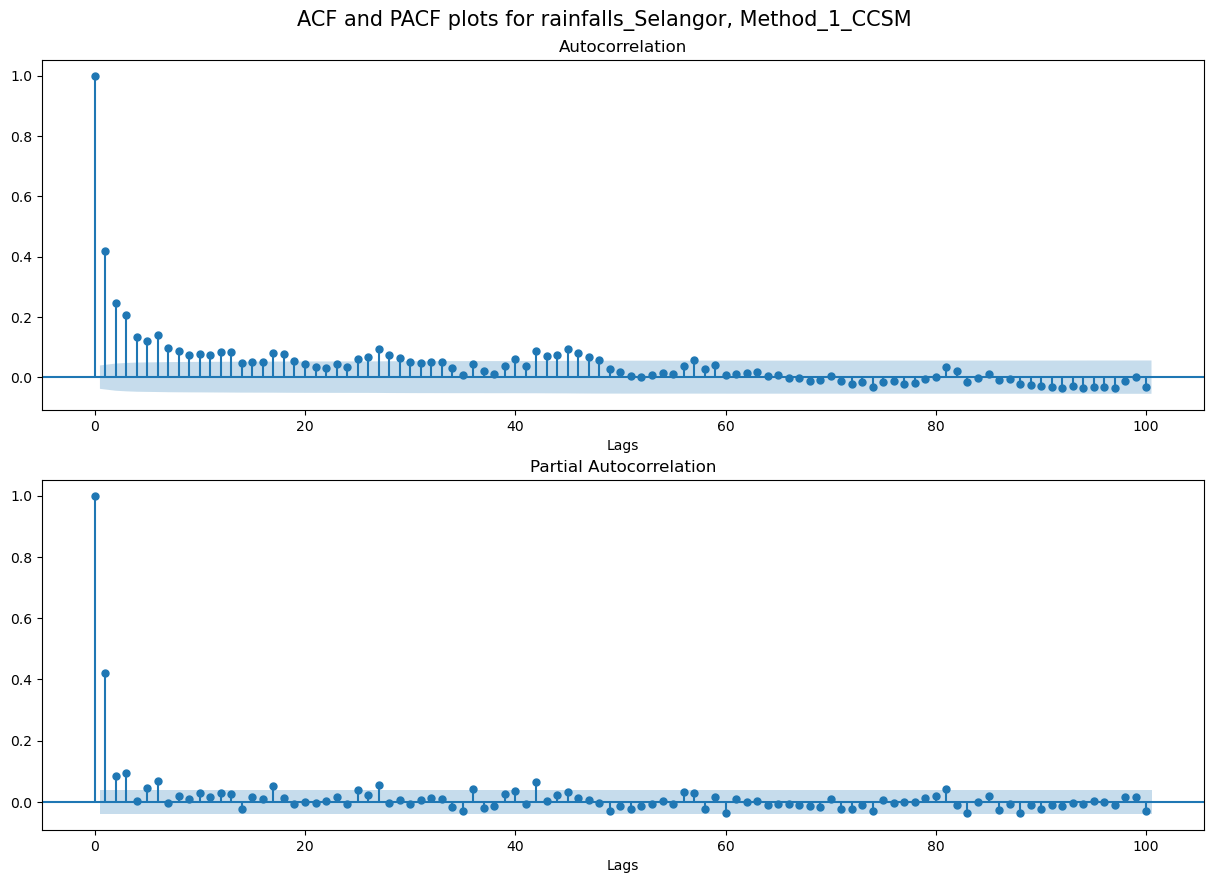

In [54]:
acf_pacf_plots("Method_1_CCSM")

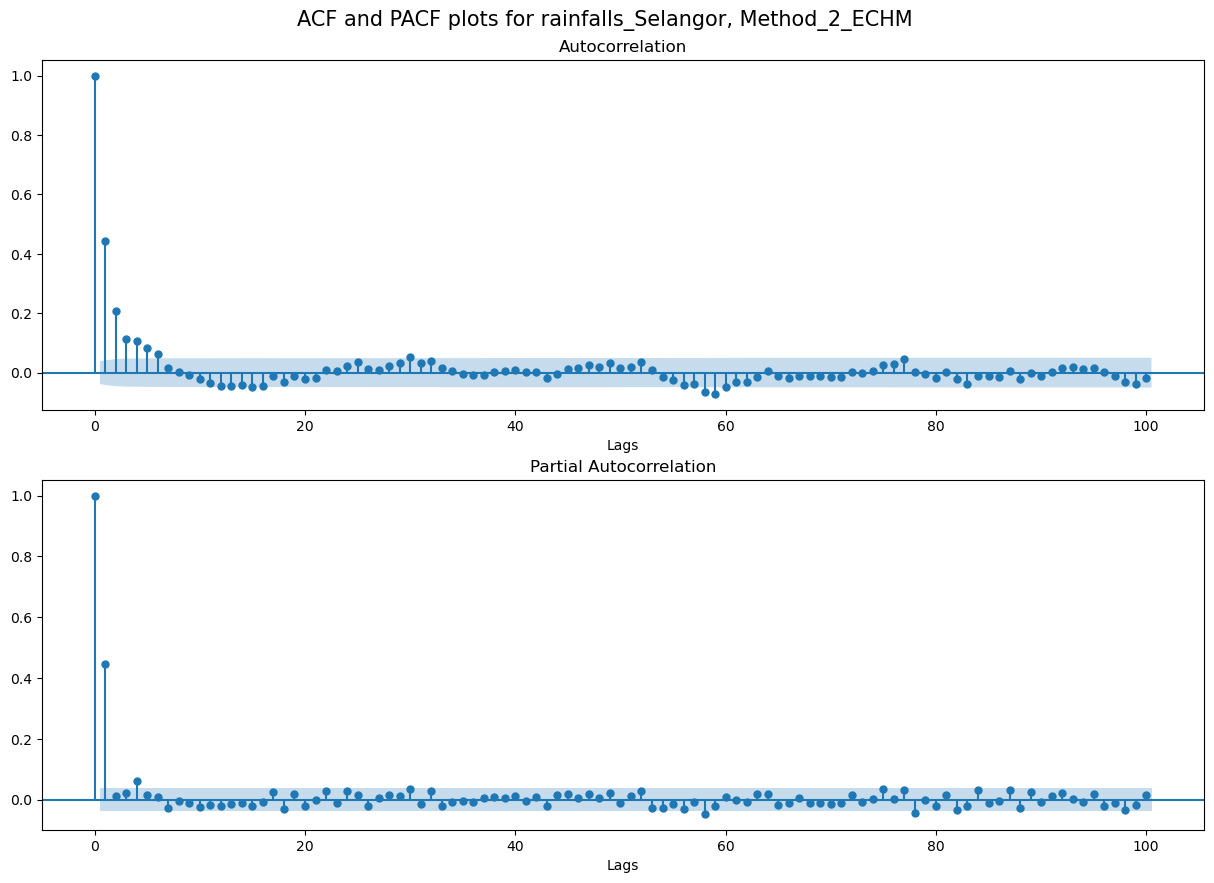

In [55]:
acf_pacf_plots("Method_2_ECHM")

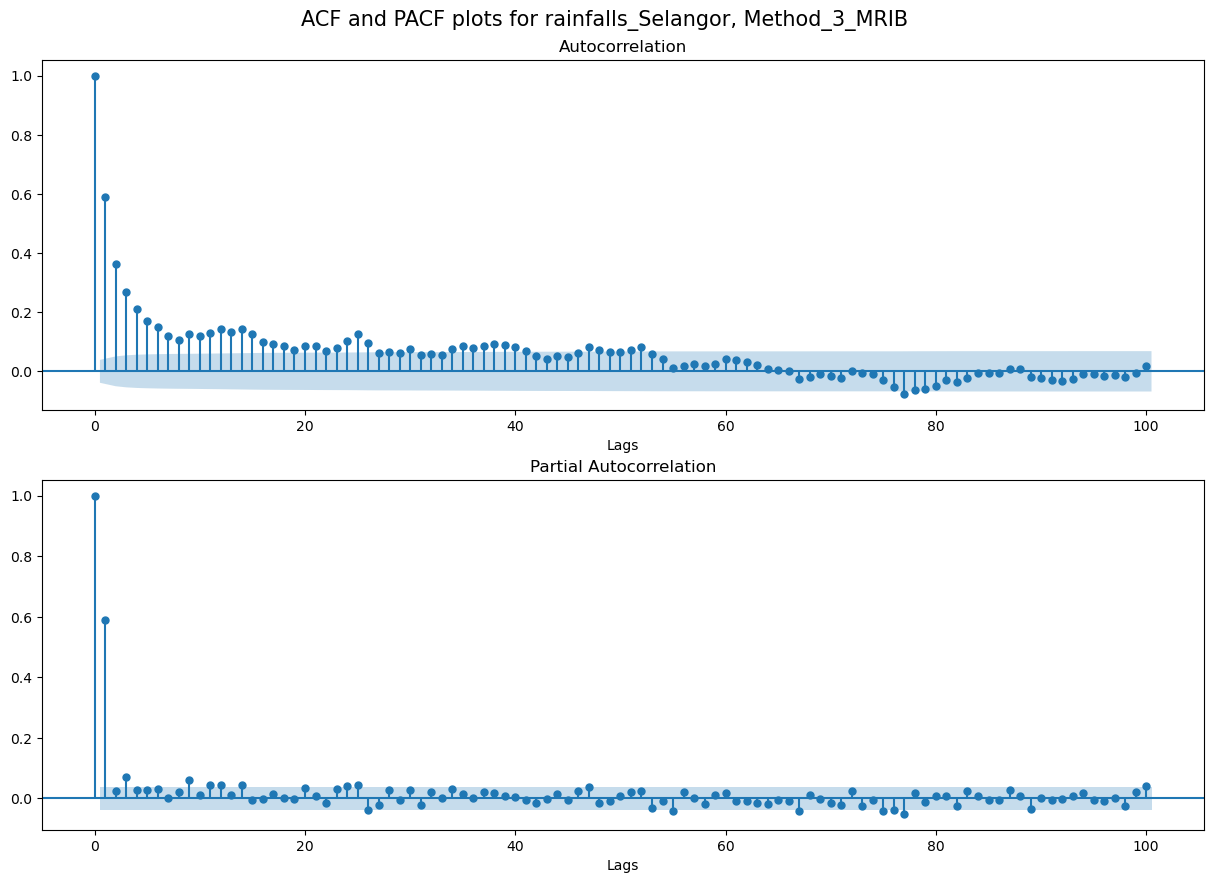

In [56]:
acf_pacf_plots("Method_3_MRIB")

From those ACF and PACF plots;

1. All PACF plots start showing patterns of noises from the second point after the point for the 0 value (of lag). Thus, it is safe to say that the number of `p` lags for the ARIMA model is `p = 1`.
2. However for ACF plots, the patterns of noises have different starting points after the point for the 0 value (of lag) for each time series data:
  - `Method_1_CCSM` starts showing them from the 9th point which gives us `q = 8` for ARIMA model of `Method_1_CCSM`,
  - `Method_2_ECHM` starts showing them from the 6th point which gives us `q = 5` for ARIMA model of `Method_2_ECHM`, and
  - `Method_3_MRIB` starts showing them from the 19th point which gives us `q = 18` for ARIMA model of `Method_3_MRIB`.

[Back to Table of Contents](#T)

<a id="S8"></a>
### Step 8 - Building the ARIMA Model

<a id="S8_I"></a>
#### Pre-Modelling - Separating the Data

Before building the model, a good practice in data science is to separate the data first into two different sets, which are the `train` and `test` sets. Models are built using the `train` sets, and then evaluated using the `test` sets for their performance.

There are many concepts serve as the guideline for separating the data. The most pouplar one is the <b>Pareto principle</b> where the data is separated into:
> <u>80% of them</u> for the `train` set, and <br>
> <u>the rest 20%</u> for the `test` set.

The <b>Pareto principle</b> is widely used <u>in Quality Control to overcome defects/errors</u> by handling one or two parameters that make up 80% of the defects/errors first. From this, the other parameters that make up the rest 20% of the defects/errors are eventually being taken care of, too.

In [57]:
# using 80/20 rule to separate the data into train/test sets
train = round(len(rainfalls_Selangor)*0.8)
test = round(len(rainfalls_Selangor)*0.2)

print(train)
print(test)
print(train + test == len(rainfalls_Selangor))

2046
511
True


In [58]:
# separate the data to prepare for the model
def separate_data(Y_var):
    # create global variables for the model
    global model_Y, model_Y_train, model_Y_test
    
    # defining the time series data as dependent data Y
    model_Y = rainfalls_Selangor[Y_var]

    # separating the dependent data Y
    model_Y_train, model_Y_test = model_Y[:-test], model_Y[-test:]

[Back to Table of Contents](#T)

<a id="S8_1"></a>
#### Part 1 - Finding the Best Parameters for the ARIMA model

Another option to obtain the best parameters for building the ARIMA model is to run the following Python codes for model testing. Thanks to `@myonin` for suggesting this option and providing its Python codes in the Kaggle.com Notebook entry [<b>Bitcoin Price. Prediction by ARIMA</b>](https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima).

This  initially validate the parameters for the ARIMA model that we have directly determined from the Time Series EDA [as in Step 7](#S7) before

In [59]:
# Finding the best parameters for the ARIMA model "Method_1_CCSM"
separate_data("Method_1_CCSM")

# Initial approximation of parameters
ps = ds = 1
qs = range(0,9)
parameters = product(qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results_CCSM = []
best_aic_CCSM = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(model_Y_train, order=(ps,ds,param)).fit()
    except ValueError:
        print("WRONG PARAMETERS! : ", param)
        continue
    aic = model.aic
    if aic < best_aic_CCSM:
        best_model_CCSM = model
        best_aic_CCSM = aic
        best_param_CCSM = param
    results_CCSM.append([param, model.aic])

In [60]:
# Best Models for Method_1_CCSM
result_CCSM_table = pd.DataFrame(results_CCSM)
result_CCSM_table.columns = ['parameters', 'aic']
print(result_CCSM_table.sort_values(by = 'aic', ascending=True).head())
print(best_model_CCSM.summary())

  parameters           aic
1       (1,)  11244.503344
2       (2,)  11383.555180
4       (4,)  11678.500709
3       (3,)  11681.409829
6       (6,)  11683.930666
                               SARIMAX Results                                
Dep. Variable:          Method_1_CCSM   No. Observations:                 2046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5619.252
Date:                Tue, 23 Feb 2021   AIC                          11244.503
Time:                        11:58:18   BIC                          11261.373
Sample:                             0   HQIC                         11250.690
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4000      0.010     39.176     

In [61]:
# Finding the best parameters for the ARIMA model "Method_2_ECHM"
separate_data("Method_2_ECHM")

# Initial approximation of parameters
ps = ds = 1
qs = range(0,6)
parameters = product(qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results_ECHM = []
best_aic_ECHM = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(model_Y_train, order=(ps,ds,param)).fit()
    except ValueError:
        print("WRONG PARAMETERS! : ", param)
        continue
    aic = model.aic
    if aic < best_aic_ECHM:
        best_model_ECHM = model
        best_aic_ECHM = aic
        best_param_ECHM = param
    results_ECHM.append([param, model.aic])

In [62]:
# Best Models for Method_2_ECHM
result_ECHM_table = pd.DataFrame(results_ECHM)
result_ECHM_table.columns = ['parameters', 'aic']
print(result_ECHM_table.sort_values(by = 'aic', ascending=True).head())
print(best_model_ECHM.summary())

  parameters           aic
1       (1,)  13986.374146
2       (2,)  14205.527787
3       (3,)  14431.733543
0       (0,)  14458.987507
4       (4,)  14460.830831
                               SARIMAX Results                                
Dep. Variable:          Method_2_ECHM   No. Observations:                 2046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6990.187
Date:                Tue, 23 Feb 2021   AIC                          13986.374
Time:                        11:58:20   BIC                          14003.244
Sample:                             0   HQIC                         13992.561
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4465      0.014     32.413     

In [63]:
# Finding the best parameters for the ARIMA model "Method_3_MRIB"
separate_data("Method_3_MRIB")

# Initial approximation of parameters
ps = ds = 1
qs = range(0,19)
parameters = product(qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results_MRIB = []
best_aic_MRIB = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(model_Y_train, order=(ps,ds,param)).fit()
    except ValueError:
        print("WRONG PARAMETERS! : ", param)
        continue
    aic = model.aic
    if aic < best_aic_MRIB:
        best_model_MRIB = model
        best_aic_MRIB = aic
        best_param_MRIB = param
    results_MRIB.append([param, model.aic])

In [64]:
# Best Models for Method_3_MRIB
result_MRIB_table = pd.DataFrame(results_MRIB)
result_MRIB_table.columns = ['parameters', 'aic']
print(result_MRIB_table.sort_values(by = 'aic', ascending=True).head())
print(best_model_MRIB.summary())

   parameters           aic
1        (1,)  11762.137520
2        (2,)  11929.853216
3        (3,)  12119.701620
7        (7,)  12139.133946
11      (11,)  12141.296109
                               SARIMAX Results                                
Dep. Variable:          Method_3_MRIB   No. Observations:                 2046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5878.069
Date:                Tue, 23 Feb 2021   AIC                          11762.138
Time:                        11:58:24   BIC                          11779.007
Sample:                             0   HQIC                         11768.325
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5254      0.015     35.86

[Back to Table of Contents](#T)

<a id="S8_2"></a>
#### Part 2 - Defining Functions to Build the ARIMA model

Now that we have separated the time series data and obtaining the best parameters for the model, let's build the ARIMA model by utilizing the Python function <b>`def`</b>.

Thanks to `@iamleonie` for the Python codes on building the ARIMA model and visualizing it in the Kaggle.com Notebook entry [<b>Intro to Time Series Forecasting</b>](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting).

In [65]:
# defining a function to construct the ARIMA model
def arima_model(mod_Y_train,mod_Y_test, p, d, q):
    # defining the dependent data Y for MA model
    Y_train = mod_Y_train
    Y_test = mod_Y_test
    
    # construct the ARIMA model using the train data
    the_model = ARIMA(Y_train, order=(p,d,q))
    the_model_fit = the_model.fit()
    
    # prepare series to store the predicted y values later in the model
    global ARIMA_test_pred, ARIMA_pred
    ARIMA_test_pred = the_model_fit.predict(Y_test.index[0], Y_test.index[-1])
    ARIMA_pred = the_model_fit.predict(Y_train.index[-1]+1, Y_train.index[-1] + len(Y_test))
    
# defining a function to visualize the model
def plot_arima_overall(y_test_pred, y_pred, col_name, p, d, q):
    mae_value = MAE(model_Y_test,y_pred)
    rsme_value = sqrt(MSE(model_Y_test,y_test_pred))
    p_value_T = T_test(model_Y_test,y_pred)[1]
    p_value_F = F_test(model_Y_test,y_pred)[1]
    
    f, ax = plt.subplots(figsize=(12,6))
    f.suptitle(f"Auto-Regressive Integrated Moving Average (ARIMA)\np = {p} | d = {d} | q = {q}", fontsize=16, y=1.1)
    sns.lineplot(x=rainfalls_Selangor.Date[:-test], y=model_Y_train, ax=ax, color='dodgerblue', label="Trained for model", linewidth=2)
    sns.lineplot(x=rainfalls_Selangor.Date[-test:], y=model_Y_test, ax=ax, color='gold', label="Actual", linewidth=2)
    sns.lineplot(x=rainfalls_Selangor.Date[-test:], y=y_pred, ax=ax, color='darkorange', label="Predicted", linewidth=2)
    ax.set_title(f"Prediction \n Mean Abs. Error = {mae_value:.3f} | Root Sq. Mean Error = {rsme_value:.3f}\
    \np-value for t-Test = {p_value_T:.3f} | p-value for F-test = {p_value_F:.3f}", fontsize=14)
    ax.set_xlabel(xlabel="Date", fontsize=14)
    ax.set_ylabel(ylabel=f"{col_name}", fontsize=14)
    plt.show()

# defining a function to plot the predicted values only
def plot_arima_pred(y_pred, Y_name):
    f, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(x=rainfalls_Selangor.Date, y=y_pred, color="darkorange")
    ax.set_title("Predicted plot for the ARIMA model")
    ax.set_ylabel(f"Predicted, {Y_name}")
    plt.show()

In [66]:
def arima_analysis(col):
    if col == "Method_1_CCSM":
        separate_data(col)
        try:
            if (p_lag_CCSM != None) & (d_diff_CCSM != None) & (q_lag_CCSM != None):
                arima_model(model_Y_train,model_Y_test,p_lag_CCSM,d_diff_CCSM,q_lag_CCSM)
                plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, p_lag_CCSM, d_diff_CCSM, q_lag_CCSM)
        except NameError:
            arima_model(model_Y_train,model_Y_test,1,1,8)
            plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, 1, 1, 8)
        plot_arima_pred(ARIMA_pred, col)
    elif col == "Method_2_ECHM":
        separate_data(col)
        try:
            if (p_lag_ECHM != None) & (d_diff_ECHM != None) & (q_lag_ECHM != None):
                arima_model(model_Y_train,model_Y_test,p_lag_ECHM,d_diff_ECHM,q_lag_ECHM)
                plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, p_lag_ECHM, d_diff_ECHM, q_lag_ECHM)
        except NameError:
            arima_model(model_Y_train,model_Y_test,1,1,5)
            plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, 1, 1, 5)
        plot_arima_pred(ARIMA_pred, col)
    elif col == "Method_3_MRIB":
        separate_data(col)
        try:
            if (p_lag_MRIB != None) & (d_diff_MRIB != None) & (q_lag_MRIB != None):
                arima_model(model_Y_train,model_Y_test,p_lag_MRIB,d_diff_MRIB,q_lag_MRIB)
                plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, p_lag_MRIB, d_diff_MRIB, q_lag_MRIB)
        except NameError:
            arima_model(model_Y_train,model_Y_test,1,1,18)
            plot_arima_overall(ARIMA_test_pred, ARIMA_pred, col, 1, 1, 18)
        plot_arima_pred(ARIMA_pred, col)
    
    else:
        return("WRONG INPUT!!!")

[Back to Table of Contents](#T)

<a id="S8_3"></a>
#### Part 3 - Testing and Visualizing the ARIMA model
And now, we are testing the model and visualizing it in a time series plot...

In [ ]:
# # run this only to reset the parameters and testing the defined function arima_analysis above
# del p_lag_CCSM, d_diff_CCSM, q_lag_CCSM, p_lag_ECHM, d_diff_ECHM, q_lag_ECHM, p_lag_MRIB, d_diff_MRIB, q_lag_MRIB

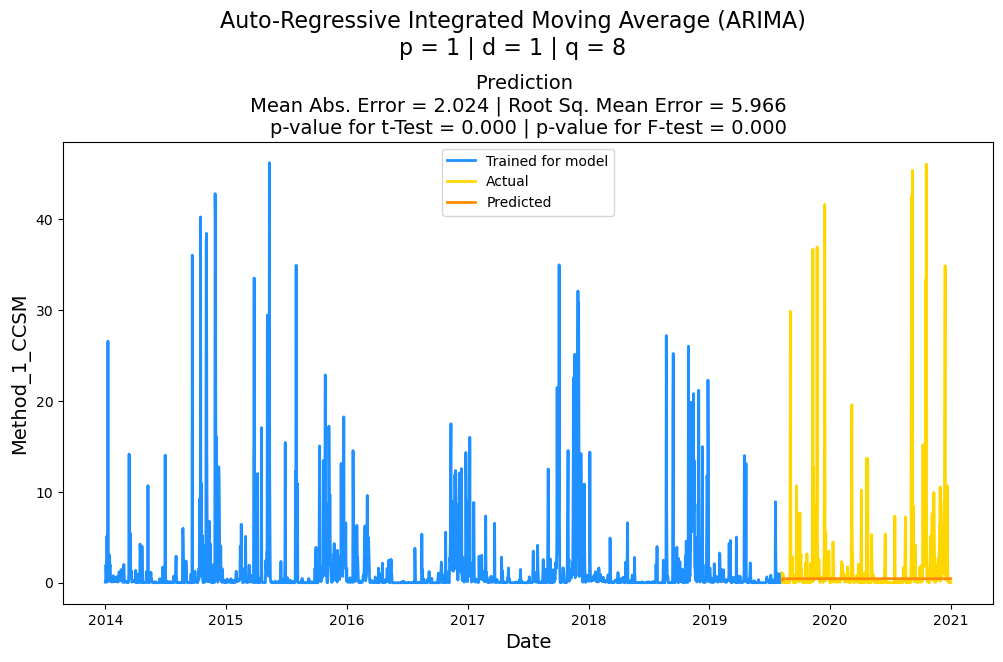

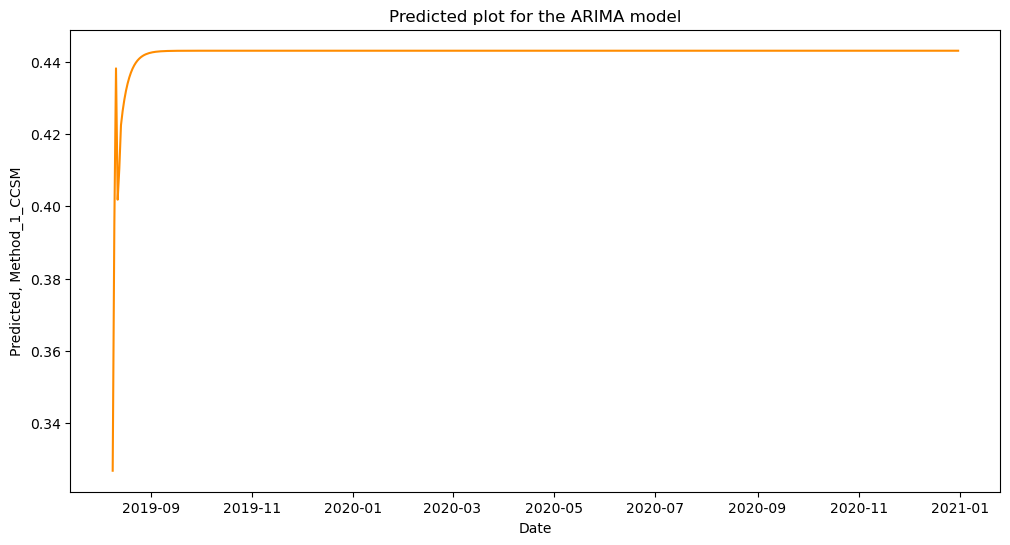

In [67]:
arima_analysis("Method_1_CCSM")

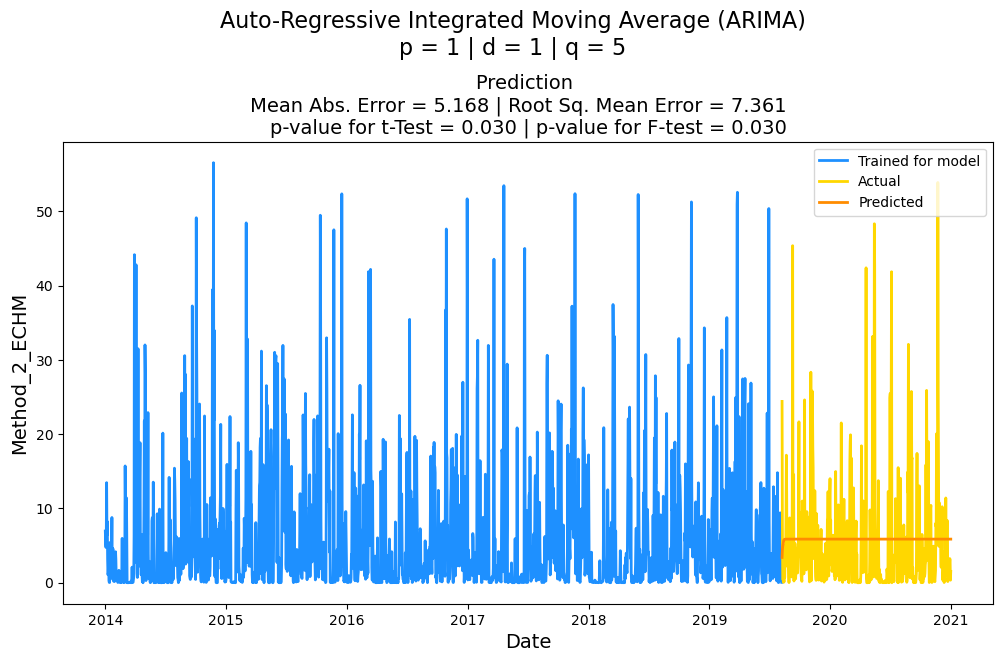

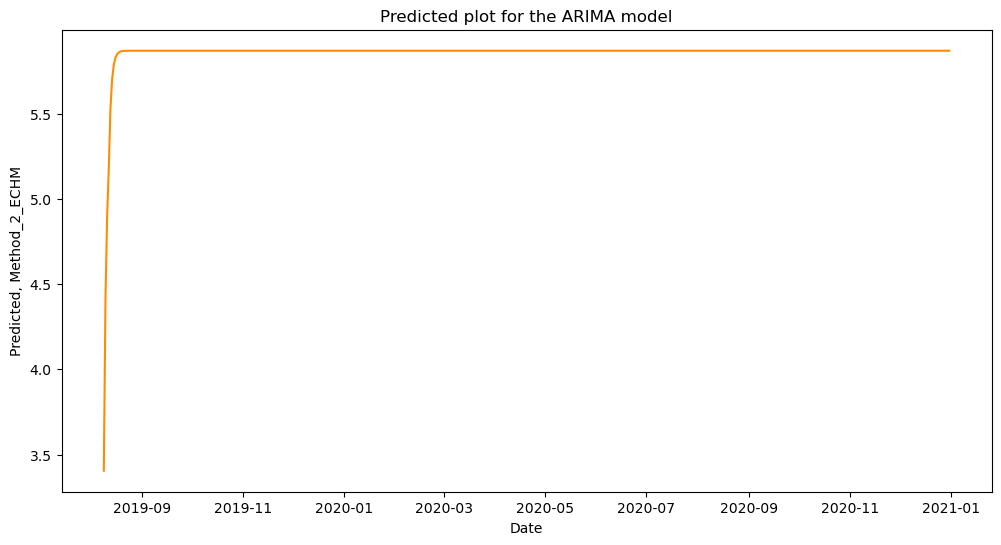

In [68]:
arima_analysis("Method_2_ECHM")

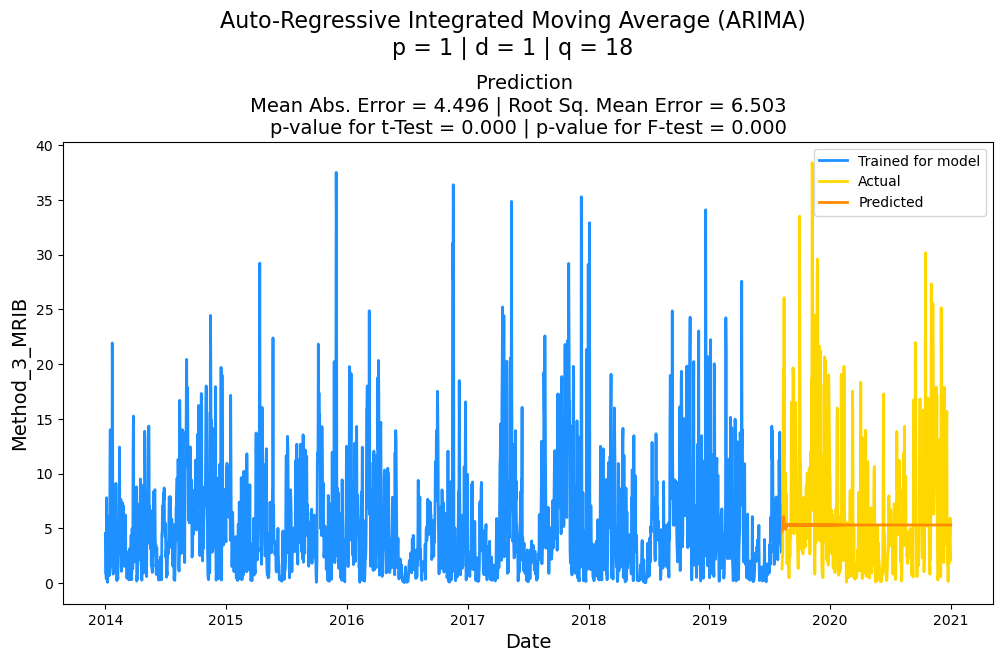

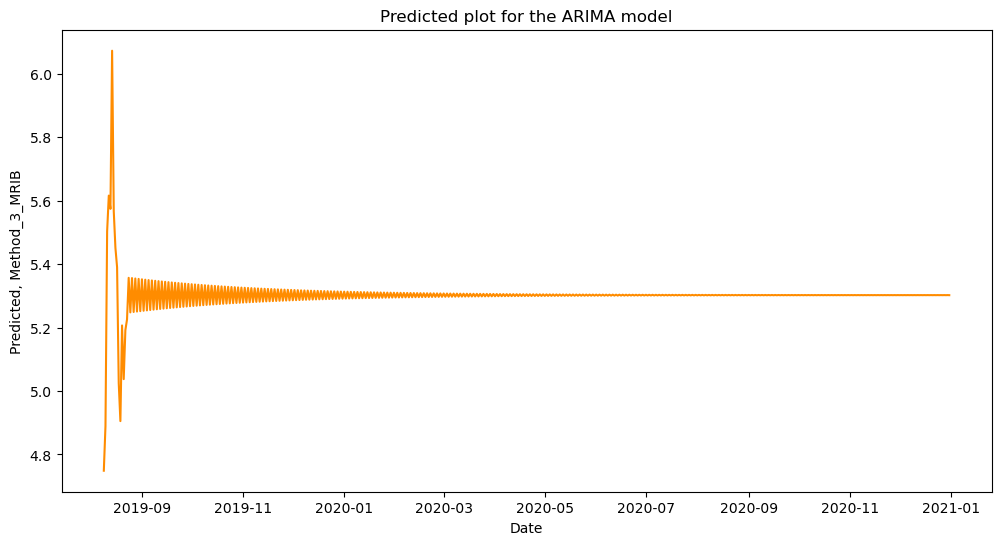

In [69]:
arima_analysis("Method_3_MRIB")

[Back to Table of Contents](#T)

Oops! Looks like I forgot to define the variables to store the parameters for the ARIMA model. Those plots are actually based on the parameters directly determined from the [Time Series EDA in Step 7](#S7) before.

Let's define the parameters based on the Best Models obtained, and run again the `arima_analysis` function:

In [70]:
# defining the variables for the ARIMA parameters determined from the best model
p_lag_CCSM, d_diff_CCSM, q_lag_CCSM = 1,1,1
p_lag_ECHM, d_diff_ECHM, q_lag_ECHM = 1,1,1
p_lag_MRIB, d_diff_MRIB, q_lag_MRIB = 1,1,1

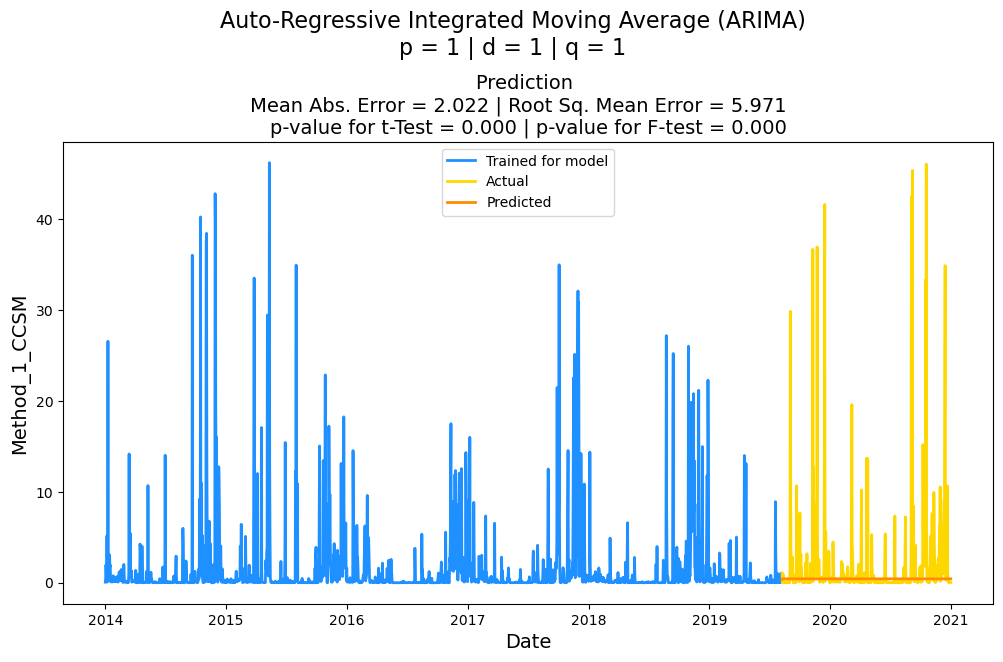

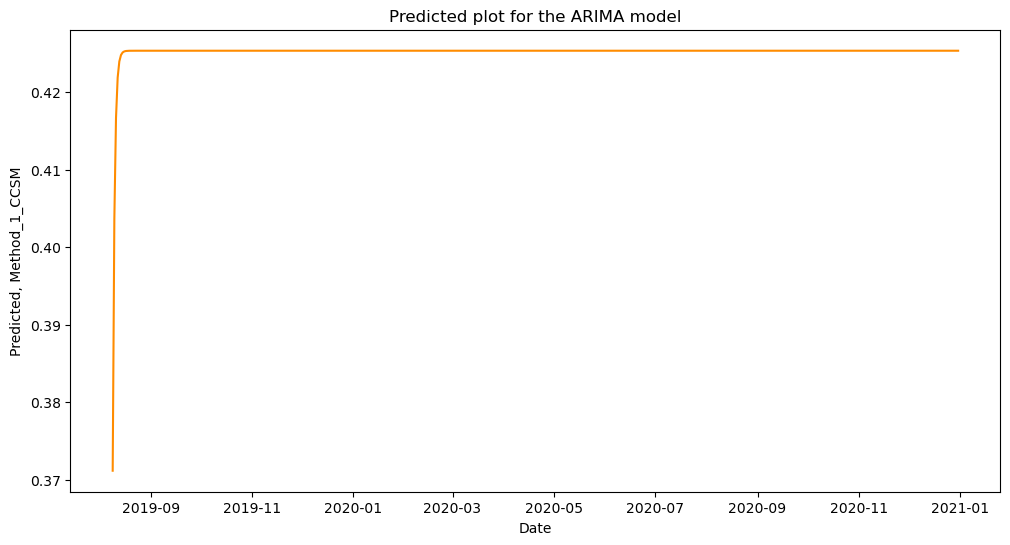

In [71]:
arima_analysis("Method_1_CCSM")

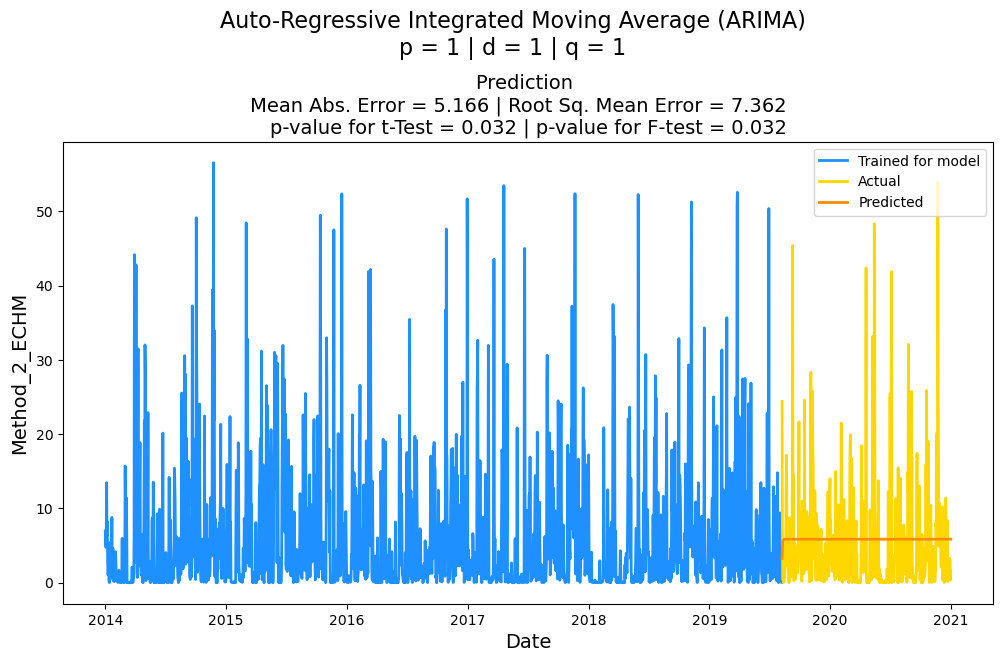

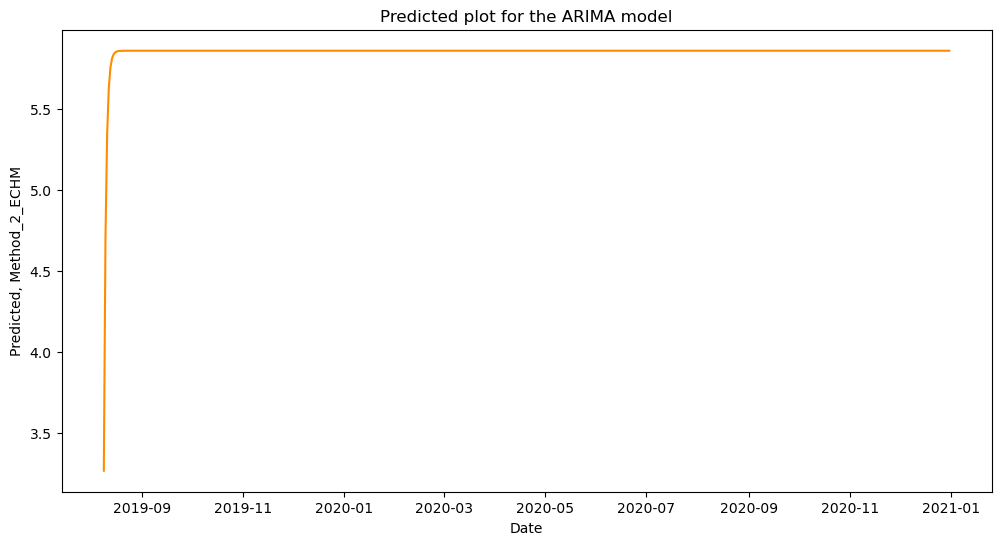

In [72]:
arima_analysis("Method_2_ECHM")

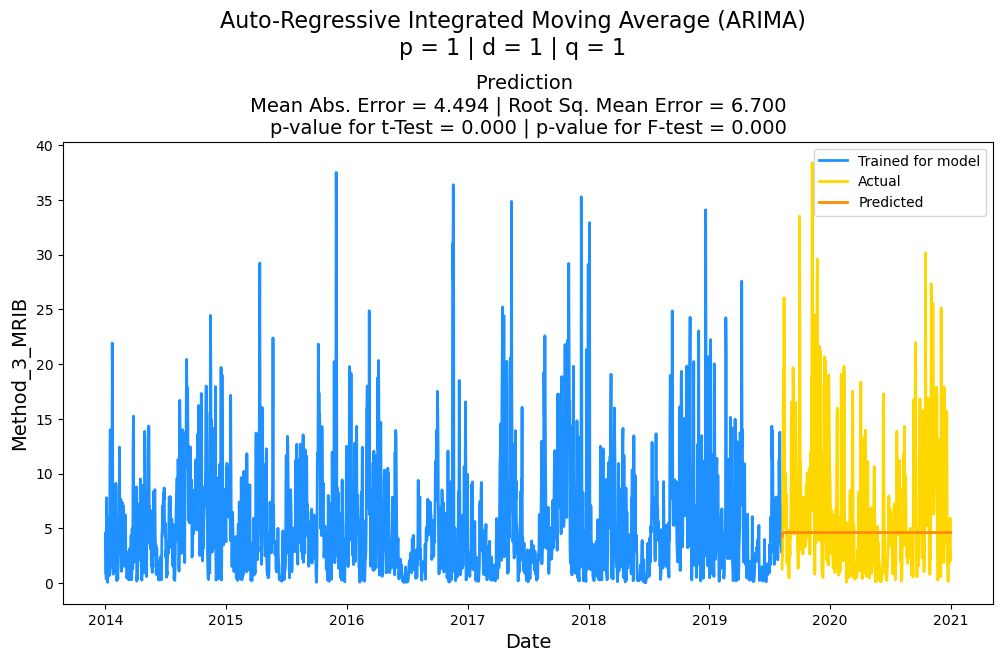

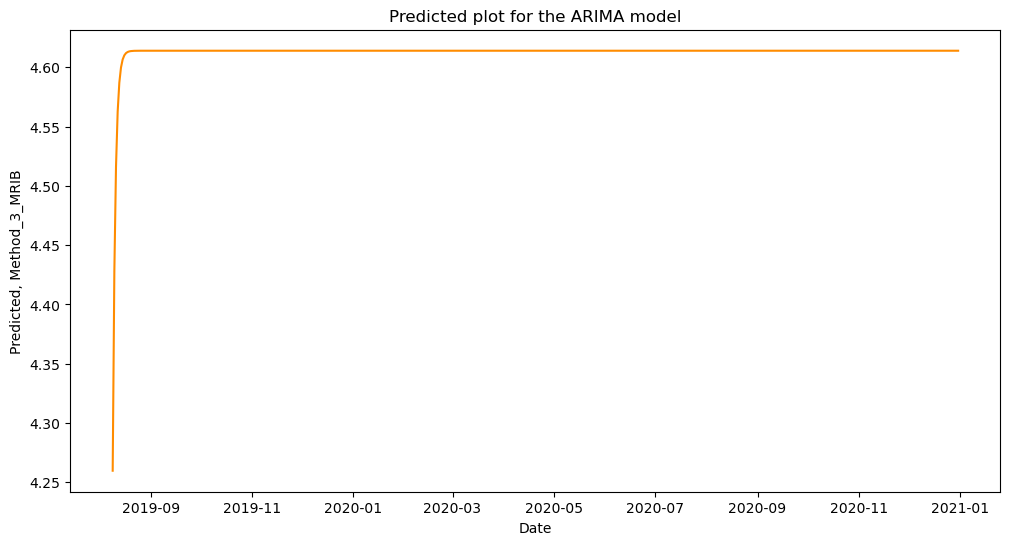

In [73]:
arima_analysis("Method_3_MRIB")

[Back to Table of Contents](#T)

<a id="S9"></a>
### Step 9 - Prediction using the ARIMA Model

As purposely mentioned in the beginning, now we will carry out the future prediction patterns using the ARIMA model. This predicition was made possible thanks to the Python codes on future prediction plots provided by `@myonin` in the Kaggle.com Notebook entry [<b>Bitcoin Price. Prediction by ARIMA</b>](https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima)

Preparing new dataframes for the prediction plots first which will include the <u>future period of 730 days</u> from (2021-01-01) till (2022-12-31)

In [74]:
CCSM_Sel_repl = rainfalls_Selangor[["Date","Method_1_CCSM"]].set_index("Date")
ECHM_Sel_repl = rainfalls_Selangor[["Date","Method_2_ECHM"]].set_index("Date")
MRIB_Sel_repl = rainfalls_Selangor[["Date","Method_3_MRIB"]].set_index("Date")

date_list = [datetime(2021,1,1) + timedelta(days=x) for x in range(730)]
future = pd.DataFrame(index=date_list, columns=rainfalls_Selangor.columns)

CCSM_Sel_repl = pd.concat([CCSM_Sel_repl, future]).dropna(how='all',axis=1)
ECHM_Sel_repl = pd.concat([ECHM_Sel_repl, future]).dropna(how='all',axis=1)
MRIB_Sel_repl = pd.concat([MRIB_Sel_repl, future]).dropna(how='all',axis=1)

<a id="S9_1"></a>
#### Part 1 - Prediction for Method 1 (CCSM)

In [75]:
pt.fit(best_model_CCSM.predict(start=1, end=3287).to_frame().to_numpy())
y1_trans = pt.transform(ARIMA(rainfalls_Selangor["Method_1_CCSM"], order=(1,1,1)).fit().predict(start=1, end=3287).to_frame().to_numpy())
y1_predicted = pt.inverse_transform(y1_trans)
CCSM_Sel_repl["Pred"] = y1_predicted
CCSM_Sel_repl

Method_1_CCSM      Pred
2014-01-01           0.06  0.060000
2014-01-02           0.41  0.297820
2014-01-03           1.97  1.264120
2014-01-04           1.03  0.881846
2014-01-05           0.11  0.425033
...                   ...       ...
2022-12-27            NaN  3.361788
2022-12-28            NaN  3.361788
2022-12-29            NaN  3.361788
2022-12-30            NaN  3.361788
2022-12-31            NaN  3.361788

[3287 rows x 2 columns]

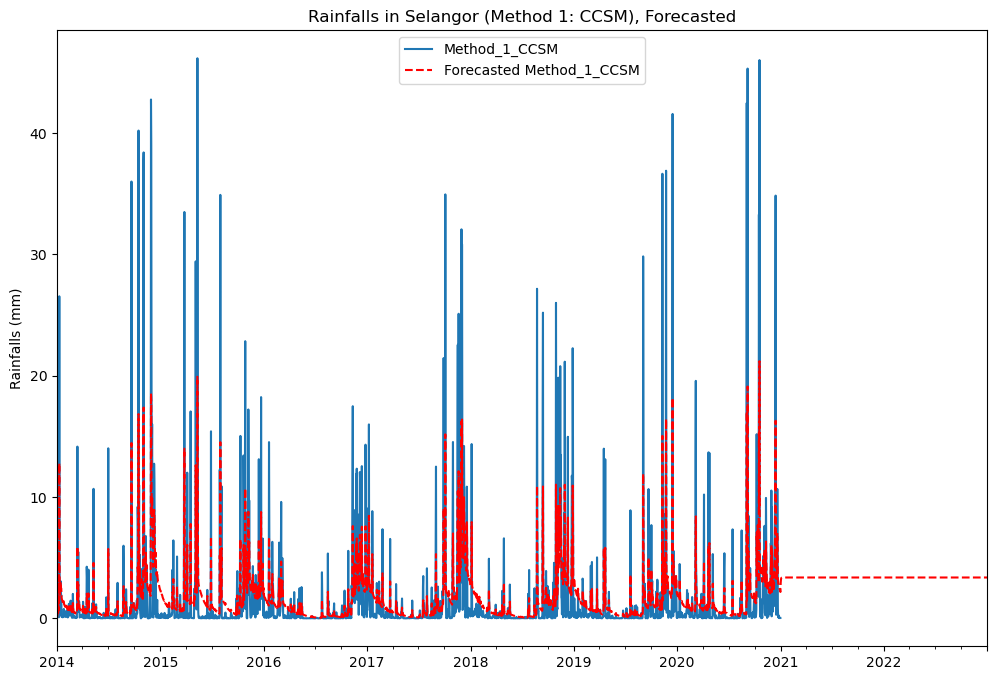

In [76]:
plt.figure(figsize=(12,8))
CCSM_Sel_repl.Method_1_CCSM.plot()
CCSM_Sel_repl.Pred.plot(color='r', ls='--', label="Forecasted Method_1_CCSM")
plt.legend()
plt.title("Rainfalls in Selangor (Method 1: CCSM), Forecasted")
plt.ylabel("Rainfalls (mm)")
plt.savefig("Predicted_Rainfalls_Selangor_Method_1_CCSM.png")
plt.show()

[Back to Table of Contents](#T)

<a id="S9_2"></a>
#### Part 2 - Prediction for Method 2 (ECHM)

In [77]:
pt.fit(best_model_ECHM.predict(start=1, end=3287).to_frame().to_numpy())
y2_trans = pt.transform(ARIMA(rainfalls_Selangor["Method_2_ECHM"], order=(1,1,1)).fit().predict(start=1, end=3287).to_frame().to_numpy())
y2_predicted = pt.inverse_transform(y2_trans)
ECHM_Sel_repl["Pred"] = y2_predicted
ECHM_Sel_repl

Method_2_ECHM       Pred
2014-01-01           6.96   6.959861
2014-01-02           5.38   5.818257
2014-01-03           4.75   5.305824
2014-01-04           6.70   6.422579
2014-01-05          13.47  10.503141
...                   ...        ...
2022-12-27            NaN   5.717527
2022-12-28            NaN   5.717527
2022-12-29            NaN   5.717527
2022-12-30            NaN   5.717527
2022-12-31            NaN   5.717527

[3287 rows x 2 columns]

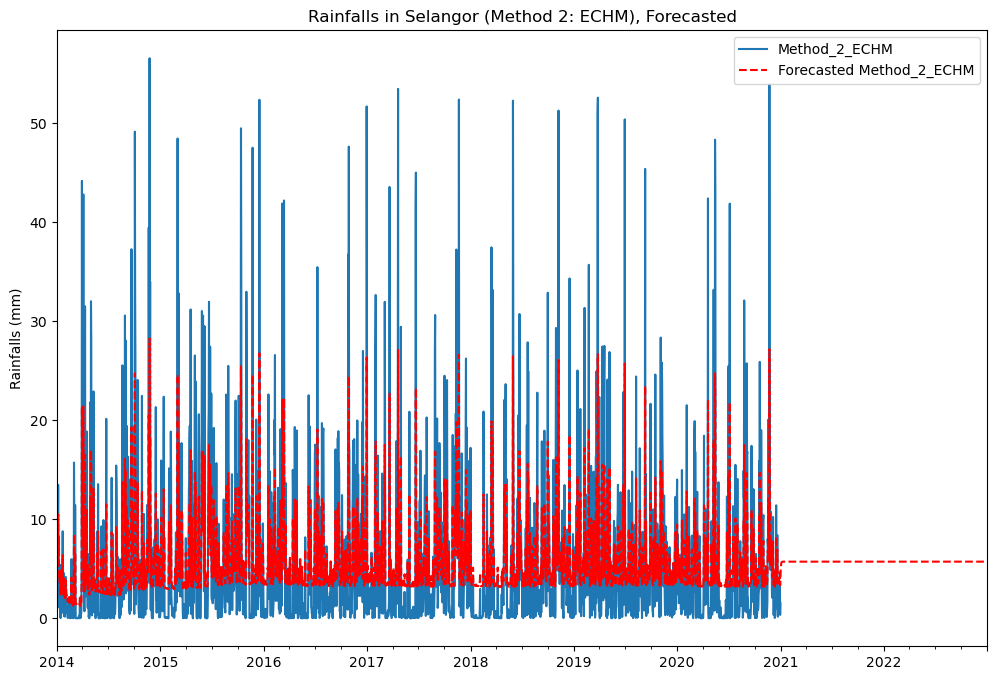

In [78]:
plt.figure(figsize=(12,8))
ECHM_Sel_repl.Method_2_ECHM.plot()
ECHM_Sel_repl.Pred.plot(color='r', ls='--', label="Forecasted Method_2_ECHM")
plt.legend()
plt.title("Rainfalls in Selangor (Method 2: ECHM), Forecasted")
plt.ylabel("Rainfalls (mm)")
plt.savefig("Predicted_Rainfalls_Selangor_Method_2_ECHM.png")
plt.show()

[Back to Table of Contents](#T)

<a id="S9_3"></a>
#### Part 3 - Prediction for Method 3 (MRIB)

In [79]:
pt.fit(best_model_MRIB.predict(start=1, end=3287).to_frame().to_numpy())
y3_trans = pt.transform(ARIMA(rainfalls_Selangor["Method_3_MRIB"], order=(1,1,1)).fit().predict(start=1, end=3287).to_frame().to_numpy())
y3_predicted = pt.inverse_transform(y3_trans)
MRIB_Sel_repl["Pred"] = y3_predicted
MRIB_Sel_repl

Method_3_MRIB      Pred
2014-01-01           4.54  4.539973
2014-01-02           0.95  1.790710
2014-01-03           0.94  1.622463
2014-01-04           0.38  1.125060
2014-01-05           7.79  5.983666
...                   ...       ...
2022-12-27            NaN  7.020169
2022-12-28            NaN  7.020169
2022-12-29            NaN  7.020169
2022-12-30            NaN  7.020169
2022-12-31            NaN  7.020169

[3287 rows x 2 columns]

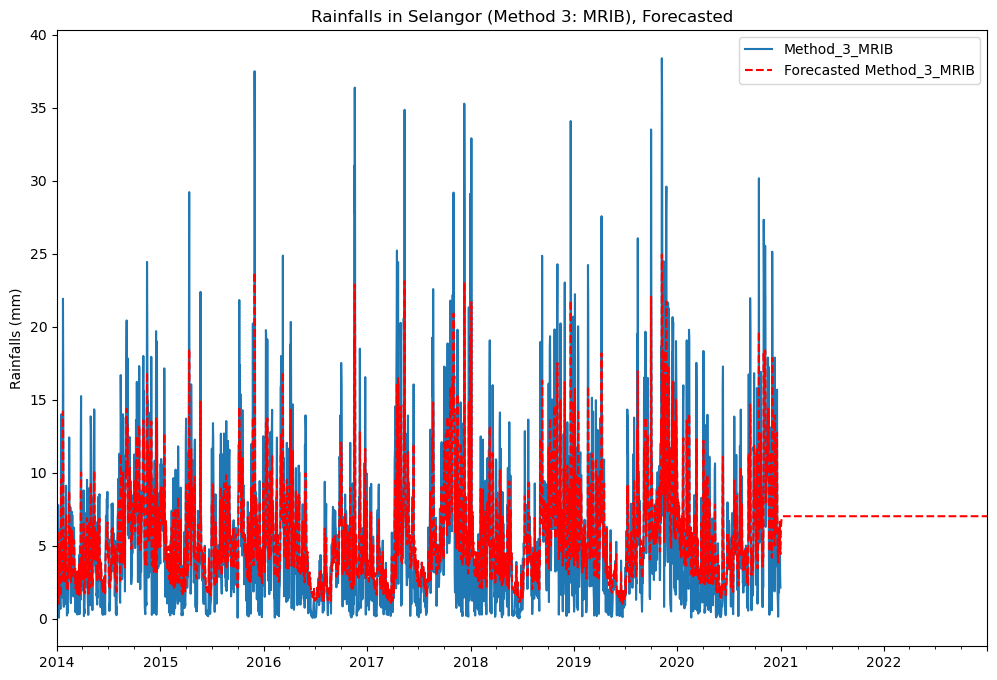

In [80]:
plt.figure(figsize=(12,8))
MRIB_Sel_repl.Method_3_MRIB.plot()
MRIB_Sel_repl.Pred.plot(color='r', ls='--', label="Forecasted Method_3_MRIB")
plt.legend()
plt.title("Rainfalls in Selangor (Method 3: MRIB), Forecasted")
plt.ylabel("Rainfalls (mm)")
plt.savefig("Predicted_Rainfalls_Selangor_Method_3_MRIB.png")
plt.show()

[Back to Table of Contents](#T)

<a id="R"></a>
### References
For further readings, I am recommending these sources as they are the primary source for creating this Notebook.

Matplotlib and Seaborn visualizations:
- Kaggle.com Notebook entry <u>Data Visualization Analysis</u> by `@kshitijmohan` | [Link](https://www.kaggle.com/kshitijmohan/data-visualization-analysis)
- Kaggle.com Notebook entry <u>Basic of Statistical Viz : Plotly & Seaborn</u> by Subin An | [Link](https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn)

Outliers detection and dealing with them:
- Kaggle.com Discussion entry <u>Outlier Detection - ASHRAE Way</u> by Gunes Evitan | [Link](https://www.kaggle.com/c/ashrae-energy-prediction/discussion/122471)
- Kaggle.com Notebook entry <u>Outlier!!! The Silent Killer</u> by `@nareshbhat` | [Link](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer)

Hypothesis Testing and p-value for validating tests and models:
- Kaggle.com Notebook entry <u>Hypothesis test and p-values</u> by John Ostrowski | [Link](https://www.kaggle.com/ostrowski/hypothesis-test-and-p-values)
- Blog entry <u>Hypothesis Test for Comparing Machine Learning Algorithms</u> by Jason Brownlee | [Link](https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/)

Time Series Forecasting using ARIMA:
- Kaggle.com Notebook entry <u>Intro to Time Series Forecasting</u> by `@iamleonie` | [Link](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting)
- Blog entry <u>4 Common Machine Learning Data Transforms for Time Series Forecasting</u> by Jason Brownlee | [Link](https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/)
- Tutorials on <u>Identifying the order of differencing in ARIMA models</u> by Robert Nau | [Link](https://people.duke.edu/~rnau/411arim2.htm)
- Kaggle.com Notebook entry <u>Bitcoin Price. Prediction by ARIMA</u> by `@myonin` | [Link](https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima)
- scikit-learn Online Documentation on <u>`sklearn.preprocessing.PowerTransformer`</u> | [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)